# Capstone

Sales transactions dominate the media in the Singapore property scene, while the rental market does not attract as much attention. I attempt to address this information gap by identifying factors that impact rent for private residential property market in Singapore.

A good understanding and robust prediction will help house owners to place their asking rent suitably, while potential tenants can benefit by short listing units that suit their budget.

This notebook is the second part of the project workflow.

## Analysis

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# sns.set_style('whitegrid')
%matplotlib inline

# Resizing print option to see all columns at once
pd.set_option('max_columns', 82)
pd.set_option('max_rows', 82)

from pprint import pprint
# import pickle
import warnings
warnings.filterwarnings('ignore')

### Retrieving Scraped Condo Data
We proceed from where we left off. To make things easier, we will just load the saved data.

In [2]:
# Import all 27 districts' condo data CSV (full dataset)
filename = 'condo_data_D1.csv'
path = './dataset/'+filename
D1_df = pd.read_csv(path)

filename = 'condo_data_D2.csv'
path = './dataset/'+filename
D2_df = pd.read_csv(path)

filename = 'condo_data_D3.csv'
path = './dataset/'+filename
D3_df = pd.read_csv(path)

filename = 'condo_data_D4.csv'
path = './dataset/'+filename
D4_df = pd.read_csv(path)

filename = 'condo_data_D5.csv'
path = './dataset/'+filename
D5_df = pd.read_csv(path)

filename = 'condo_data_D6.csv'
path = './dataset/'+filename
D6_df = pd.read_csv(path)

filename = 'condo_data_D7.csv'
path = './dataset/'+filename
D7_df = pd.read_csv(path)

filename = 'condo_data_D8.csv'
path = './dataset/'+filename
D8_df = pd.read_csv(path)

filename = 'condo_data_D9.csv'
path = './dataset/'+filename
D9_df = pd.read_csv(path)

filename = 'condo_data_D10.csv'
path = './dataset/'+filename
D10_df = pd.read_csv(path)

filename = 'condo_data_D11.csv'
path = './dataset/'+filename
D11_df = pd.read_csv(path)

filename = 'condo_data_D12.csv'
path = './dataset/'+filename
D12_df = pd.read_csv(path)

filename = 'condo_data_D13.csv'
path = './dataset/'+filename
D13_df = pd.read_csv(path)

filename = 'condo_data_D14.csv'
path = './dataset/'+filename
D14_df = pd.read_csv(path)

filename = 'condo_data_D15.csv'
path = './dataset/'+filename
D15_df = pd.read_csv(path)

filename = 'condo_data_D16.csv'
path = './dataset/'+filename
D16_df = pd.read_csv(path)

filename = 'condo_data_D17.csv'
path = './dataset/'+filename
D17_df = pd.read_csv(path)

filename = 'condo_data_D18.csv'
path = './dataset/'+filename
D18_df = pd.read_csv(path)

filename = 'condo_data_D19.csv'
path = './dataset/'+filename
D19_df = pd.read_csv(path)

filename = 'condo_data_D20.csv'
path = './dataset/'+filename
D20_df = pd.read_csv(path)

filename = 'condo_data_D21.csv'
path = './dataset/'+filename
D21_df = pd.read_csv(path)

filename = 'condo_data_D22.csv'
path = './dataset/'+filename
D22_df = pd.read_csv(path)

filename = 'condo_data_D23.csv'
path = './dataset/'+filename
D23_df = pd.read_csv(path)

filename = 'condo_data_D25.csv'
path = './dataset/'+filename
D25_df = pd.read_csv(path)

filename = 'condo_data_D26.csv'
path = './dataset/'+filename
D26_df = pd.read_csv(path)

filename = 'condo_data_D27.csv'
path = './dataset/'+filename
D27_df = pd.read_csv(path)

filename = 'condo_data_D28.csv'
path = './dataset/'+filename
D28_df = pd.read_csv(path)

# Merge all these 27 full datasets
condo_df = pd.concat([D1_df, D2_df, D3_df, D4_df, D5_df, D6_df, D7_df, D8_df, 
                      D9_df, D10_df, D11_df, D12_df, D13_df, D14_df, D15_df, 
                      D16_df, D17_df, D18_df, D19_df, D20_df, D21_df, D22_df, 
                      D23_df, D25_df, D26_df, D27_df, D28_df],axis=0)
condo_df.reset_index(drop=True, inplace=True) # Remember to readjust the index
condo_df.shape

(6138, 23)

In [3]:
# Quick look at the composition of the merged dataset
condo_df.groupby('district').size()

district
D1 - Boat Quay / Raffles Place / Marina              281
D10 - Tanglin / Holland / Bukit Timah                669
D11 - Newton / Novena                                245
D12 - Balestier / Toa Payoh                          187
D13 - Macpherson / Potong Pasir                       76
D14 - Eunos / Geylang / Paya Lebar                   248
D15 - East Coast / Marine Parade                     433
D16 - Bedok / Upper East Coast                       177
D17 - Changi Airport / Changi Village                 57
D18 - Pasir Ris / Tampines                           146
D19 - Hougang / Punggol / Sengkang                   324
D2 - Chinatown / Tanjong Pagar                       191
D20 - Ang Mo Kio / Bishan / Thomson                  202
D21 - Clementi Park / Upper Bukit Timah              162
D22 - Boon Lay / Jurong / Tuas                       217
D23 - Dairy Farm / Bukit Panjang / Choa Chu Kang     147
D25 - Admiralty / Woodlands                           63
D26 - Mandai / Upper T

### Data Cleaning

In [4]:
# Quick overview of condo data
print("Dataframe shape: ",condo_df.shape)
print(condo_df.columns)

Dataframe shape:  (6138, 23)
Index(['condo_id', 'URL', 'prop_name', 'prop_type', 'district', 'bed', 'bath',
       'furnish', 'area', 'tenure', 'unit_count', 'built_year', 'date_avail',
       'room_type', 'lease', 'model', 'developer', 'address', 'latitude',
       'longitude', 'description', 'psf', 'rent'],
      dtype='object')


In [5]:
# Quick peek
condo_df.head()

,condo_id,URL,prop_name,prop_type,district,bed,bath,furnish,area,tenure,unit_count,built_year,date_avail,room_type,lease,model,developer,address,latitude,longitude,description,psf,rent
0,83532311,https://www.srx.com.sg/listings/83532311/for-r...,The Sail @ Marina Bay,Apartment,D1 - Boat Quay / Raffles Place / Marina,1,1,Fully Furnished,678 sqft (Built-up),LEASEHOLD/99 years,1111,2008,EMPTY,Whole House,Flexible,Apartment,Glengary Pte Ltd,The Sail @ Marina Bay,1.280769,103.852659,Beautifully furnished unit. Available April 20...,$4.87 psf (Built-up),"$3,300"
1,77073912,https://www.srx.com.sg/listings/77073912/for-r...,The Clift,Apartment,D1 - Boat Quay / Raffles Place / Marina,2,2,Partially Furnished,"1,076 sqft (Built-up)",LEASEHOLD/99 years,312,2011,EMPTY,Whole House,Flexible,Apartment,Natwest Development Pte Ltd,21 McCallum Street (069047),1.279400,103.847330,The Clift \r\n (21 Mccallum Street) \r\n \r\...,$5.02 psf (Built-up),"$5,400"
2,77090802,https://www.srx.com.sg/listings/77090802/for-r...,The Clift,Apartment,D1 - Boat Quay / Raffles Place / Marina,1,1,Partially Furnished,775 sqft (Built-up),LEASEHOLD/99 years,312,2011,EMPTY,Whole House,Flexible,Apartment,Natwest Development Pte Ltd,21 McCallum Street (069047),1.279400,103.847330,The Clift \r\n (21 Mccallum Street) \r\n \r\...,$5.68 psf (Built-up),"$4,400"
3,83340422,https://www.srx.com.sg/listings/83340422/for-r...,Marina Bay Suites,Condominium,D1 - Boat Quay / Raffles Place / Marina,3,3,Fully Furnished,"1,615 sqft (Built-up)",LEASEHOLD/99 years,221,2013,16-Apr-19,Whole House,Flexible,Condominium,Marina Bay Suites Pte Ltd,3 Central Boulevard (018965),1.280345,103.852143,۩Rare 3 Bedrooms Unit For Rent @ Extremely Pri...,$5.14 psf (Built-up),"$8,300"
4,79741502,https://www.srx.com.sg/listings/79741502/for-r...,The Clift,Apartment,D1 - Boat Quay / Raffles Place / Marina,1,1,Partially Furnished,829 sqft (Built-up),LEASEHOLD/99 years,312,2011,13-Apr-18,Whole House,12 Months,Apartment,Natwest Development Pte Ltd,21 McCallum Street (069047),1.279400,103.847330,"The Clift,an upmarket apartment project conven...",$6.39 psf (Built-up),"$5,300"


In [6]:
# Quick check
condo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6138 entries, 0 to 6137
Data columns (total 23 columns):
condo_id       6138 non-null int64
URL            6138 non-null object
prop_name      6138 non-null object
prop_type      6138 non-null object
district       6138 non-null object
bed            6138 non-null object
bath           6138 non-null int64
furnish        6138 non-null object
area           6138 non-null object
tenure         6138 non-null object
unit_count     6138 non-null object
built_year     6138 non-null object
date_avail     6138 non-null object
room_type      6138 non-null object
lease          6138 non-null object
model          6138 non-null object
developer      6138 non-null object
address        6138 non-null object
latitude       6138 non-null float64
longitude      6138 non-null float64
description    6071 non-null object
psf            6138 non-null object
rent           6138 non-null object
dtypes: float64(2), int64(2), object(19)
memory usage: 1.1+ MB


In [7]:
# Clean up 'district': Just take the first segment
condo_df['district'] = condo_df['district'].map(lambda x: x.split()[0])

In [8]:
# Clean up 'area': Take the numeric, discard thousand separator, then cast as int
condo_df['area'] = condo_df['area'].map(lambda x: int(x.split()[0].replace(',','')))

In [9]:
# Clean up 'psf':  Take the numeric, discard $ sign, then cast as float
condo_df['psf'] = condo_df['psf'].map(lambda x: float(x.split()[0].replace('$','')))

In [10]:
# Clean up 'rent': Discard $ sign & thousand separator, then cast as int
condo_df['rent'] = condo_df['rent'].map(lambda x: int(x.split()[0].replace('$','').replace(',','')))

In [11]:
# Convert the following columns to lowercase for easier manipulation later
condo_df['prop_name'] = condo_df['prop_name'].str.lower()
condo_df['prop_type'] = condo_df['prop_type'].str.lower()
condo_df['furnish'] = condo_df['furnish'].str.lower()
condo_df['tenure'] = condo_df['tenure'].str.lower()
condo_df['room_type'] = condo_df['room_type'].str.lower()
condo_df['lease'] = condo_df['lease'].str.lower()
condo_df['model'] = condo_df['model'].str.lower()
condo_df['developer'] = condo_df['developer'].str.lower()
condo_df['address'] = condo_df['address'].str.lower()

# Leave the 'description' column as it is for now
# condo_df['description'] = condo_df['description'].str.lower()

In [12]:
# Quick check to confirm that the string conversion was done properly
condo_df.head()

,condo_id,URL,prop_name,prop_type,district,bed,bath,furnish,area,tenure,unit_count,built_year,date_avail,room_type,lease,model,developer,address,latitude,longitude,description,psf,rent
0,83532311,https://www.srx.com.sg/listings/83532311/for-r...,the sail @ marina bay,apartment,D1,1,1,fully furnished,678,leasehold/99 years,1111,2008,EMPTY,whole house,flexible,apartment,glengary pte ltd,the sail @ marina bay,1.280769,103.852659,Beautifully furnished unit. Available April 20...,4.87,3300
1,77073912,https://www.srx.com.sg/listings/77073912/for-r...,the clift,apartment,D1,2,2,partially furnished,1076,leasehold/99 years,312,2011,EMPTY,whole house,flexible,apartment,natwest development pte ltd,21 mccallum street (069047),1.279400,103.847330,The Clift \r\n (21 Mccallum Street) \r\n \r\...,5.02,5400
2,77090802,https://www.srx.com.sg/listings/77090802/for-r...,the clift,apartment,D1,1,1,partially furnished,775,leasehold/99 years,312,2011,EMPTY,whole house,flexible,apartment,natwest development pte ltd,21 mccallum street (069047),1.279400,103.847330,The Clift \r\n (21 Mccallum Street) \r\n \r\...,5.68,4400
3,83340422,https://www.srx.com.sg/listings/83340422/for-r...,marina bay suites,condominium,D1,3,3,fully furnished,1615,leasehold/99 years,221,2013,16-Apr-19,whole house,flexible,condominium,marina bay suites pte ltd,3 central boulevard (018965),1.280345,103.852143,۩Rare 3 Bedrooms Unit For Rent @ Extremely Pri...,5.14,8300
4,79741502,https://www.srx.com.sg/listings/79741502/for-r...,the clift,apartment,D1,1,1,partially furnished,829,leasehold/99 years,312,2011,13-Apr-18,whole house,12 months,apartment,natwest development pte ltd,21 mccallum street (069047),1.279400,103.847330,"The Clift,an upmarket apartment project conven...",6.39,5300


In [13]:
# Ferret out NaN
condo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6138 entries, 0 to 6137
Data columns (total 23 columns):
condo_id       6138 non-null int64
URL            6138 non-null object
prop_name      6138 non-null object
prop_type      6138 non-null object
district       6138 non-null object
bed            6138 non-null object
bath           6138 non-null int64
furnish        6138 non-null object
area           6138 non-null int64
tenure         6138 non-null object
unit_count     6138 non-null object
built_year     6138 non-null object
date_avail     6138 non-null object
room_type      6138 non-null object
lease          6138 non-null object
model          6138 non-null object
developer      6138 non-null object
address        6138 non-null object
latitude       6138 non-null float64
longitude      6138 non-null float64
description    6071 non-null object
psf            6138 non-null float64
rent           6138 non-null int64
dtypes: float64(3), int64(4), object(16)
memory usage: 1.1+ MB


In [14]:
# Check out why 'description' has NaN
condo_df[condo_df['description'].isnull()]

,condo_id,URL,prop_name,prop_type,district,bed,bath,furnish,area,tenure,unit_count,built_year,date_avail,room_type,lease,model,developer,address,latitude,longitude,description,psf,rent
222,83324492,https://www.srx.com.sg/listings/83324492/for-r...,marina bay residences,condominium,D1,2,2,partially furnished,1130,leasehold/99 years,428,2010,EMPTY,whole house,flexible,condominium,marina bay residences pte ltd,18 marina bay residences (018980),1.279626,103.854987,NaN,5.40,6100
824,82061622,https://www.srx.com.sg/listings/82061622/for-r...,the residences at w singapore sentosa cove,condominium,D4,4,4,partially furnished,3348,leasehold/99 years,228,2011,11-Dec-18,whole house,12 months,condominium,cityview place holdings pte ltd,9 ocean way (098371),1.248128,103.842231,NaN,4.33,14500
870,50583862,https://www.srx.com.sg/listings/50583862/for-r...,the berth by the cove,condominium,D4,4,4,partially furnished,3089,leasehold/99 years,200,2007,EMPTY,whole house,flexible,condominium,ho bee group,ocean drive,1.249222,103.846316,NaN,3.88,12000
909,83265012,https://www.srx.com.sg/listings/83265012/for-r...,skyline residences,condominium,D4,1,1,partially furnished,484,freehold,283,2015,EMPTY,whole house,flexible,condominium,bukit sembawang view pte ltd,612 skyline residences (109026),1.272498,103.807425,NaN,6.10,2950
1295,83351552,https://www.srx.com.sg/listings/83351552/for-r...,concourse skyline,apartment,D7,1,1,partially furnished,861,leasehold/99 years,360,2014,EMPTY,whole house,flexible,apartment,hong fok land ltd,296 concourse skyline (199599),1.300704,103.861861,NaN,4.88,4200
1439,83396022,https://www.srx.com.sg/listings/83396022/for-r...,the laurels,condominium,D9,1,1,fully furnished,549,freehold,229,2013,EMPTY,whole house,flexible,condominium,sing holdings (cairnhill) pte ltd,38 cairnhill road (229658),1.304774,103.837432,NaN,6.92,3800
1565,83373352,https://www.srx.com.sg/listings/83373352/for-r...,lloyd sixtyfive,apartment,D9,1,1,partially furnished,904,freehold,76,2016,22-Apr-19,whole house,flexible,apartment,tg (2010) pte ltd,lloyd road,1.297273,103.838940,NaN,5.86,5300
1567,83373382,https://www.srx.com.sg/listings/83373382/for-r...,lloyd sixtyfive,apartment,D9,3,3,partially furnished,2422,freehold,76,2016,22-Apr-19,whole house,flexible,apartment,tg (2010) pte ltd,lloyd road,1.297273,103.838940,NaN,5.78,14000
1568,83373362,https://www.srx.com.sg/listings/83373362/for-r...,lloyd sixtyfive,apartment,D9,2,1,partially furnished,1808,freehold,76,2016,22-Apr-19,whole house,flexible,apartment,tg (2010) pte ltd,lloyd road,1.297273,103.838940,NaN,4.98,9000
1749,81385102,https://www.srx.com.sg/listings/81385102/for-r...,espada,apartment,D9,1,1,partially furnished,689,freehold,232,2013,26-Oct-18,whole house,24 months,apartment,novelty orchard development pte ltd,48 st. thomas walk (238126),1.297342,103.836742,NaN,5.22,3600


In [15]:
# Property agent didn't bother to write it up. Just replace with sentinel value 'EMPTY' for easier identification
condo_df['description'].fillna(value='EMPTY', inplace=True)

In [16]:
# Remove duplicate entries
condo_df.drop_duplicates(inplace=True)
condo_df.reset_index(drop=True, inplace=True)
condo_df.shape

(6095, 23)

### Feature Engineering

#### District:
In Singapore, districts are zoned into 3 broad regions, namely Core Central Region (CCR), Rest of Central Region (RCR) and Outside Central Region (OCR). Details are available <a href="https://spring.ura.gov.sg/lad/ore/login/glossary.cfm?no=1">here</a>.

In [17]:
# Classify districts into Core Central Region, Rest of Central Region or Outside of Central Region
def group_region(district):

    mapping = {
        'D1':'CCR',
        'D2':'CCR',
        'D3':'RCR',
        'D4':'RCR',
        'D5':'RCR',
        'D6':'CCR',
        'D7':'RCR',
        'D8':'RCR',
        'D9':'CCR',
        'D10':'CCR',
        'D11':'CCR',
        'D12':'RCR',
        'D13':'RCR',
        'D14':'RCR',
        'D15':'RCR',
        'D16':'OCR',
        'D17':'OCR',
        'D18':'OCR',
        'D19':'OCR',
        'D20':'RCR',
        'D21':'OCR',
        'D22':'OCR',
        'D23':'OCR',
        'D24':'OCR',
        'D25':'OCR',
        'D26':'OCR',
        'D27':'OCR',
        'D28':'OCR',
    }
    return mapping[district]

condo_df['region'] = condo_df['district'].apply(group_region)


#### Number of bedrooms:
We will have a look at the `'bed'` columns, denoting the number of bedrooms in an apartment/condo unit.
By design, 'studio' apartments have no bedroom, so we will reclassify it as '0', then cast the feature variable as integer.

In [18]:
# Check out the bedroom count breakdown
condo_df['bed'].value_counts()

2         1701
3         1641
1         1380
4          740
Studio     203
3          139
5          136
2           66
1           46
4           27
6            9
7            3
8            2
6            1
5            1
Name: bed, dtype: int64

In [19]:
condo_df['bed'].replace('Studio', '0', inplace=True)
condo_df['bed'] = condo_df['bed'].astype(int)

#### Land Tenure:
In Singapore, land tenure have 3 broad categories, namely 99 years leasehold, 999 years leashold and freehold. In reality, characteristics of 999 years leasehold properties and freehold lease properties are virtually indistinguishable (e.g. unlike 99 years leasehold properties, their properties values hardly depreciate as time progresses). <p>For simplicity, we will consider any land tenure of 99 years or less as 'leasehold' and anything above 99 years as 'freehold'.

In [20]:
# Check out the land tenure breakdown
condo_df['tenure'].value_counts()

leasehold/99 years           3126
freehold                     2631
999 years                     216
leasehold/103 years            60
99 years                       15
956 years from 27/05/1928      11
929 years from 01/01/1953       8
leasehold/60 years              6
leasehold/30 years              3
100 years from 01/02/1986       3
947 years from 15/05/1937       2
99 years from 06/01/2010        1
99 years from 23/07/2002        1
99 years from 28/04/2004        1
946 years from 23/06/1938       1
99 years from 03/01/2011        1
99 years from 13/12/2000        1
946 years from 01/01/1938       1
99 years from 05/12/2011        1
99 years from 25/06/2008        1
99 years from 19/03/2012        1
99 years from 17/08/1979        1
99 years from 06/02/2008        1
99 years from 05/11/2012        1
99 years from 31/05/1993        1
Name: tenure, dtype: int64

In [21]:
# Clean up and simplify the 'tenure' feature variable
def group_tenure(tenure):
    if "99 years" in tenure and "999 years" not in tenure:
        return 'leasehold'
    elif "leasehold/30 years" in tenure:
        return 'leasehold'
    elif "leasehold/60 years" in tenure:
        return 'leasehold'
    else:
        return 'freehold'
    
condo_df['tenure'] = condo_df['tenure'].apply(group_tenure)

#### Unit Count:
This variable depicts the number of dwelling units for a given apartment/condominium. We can use this figure as a proxy for density; if there are more units, the residential density is higher, and vice versa. We expect that property with lower density is more desirable to live in (more privacy, more _exclusive_), hence higher demand.

In [22]:
# Check out the breakdown for 'unit_count'
condo_df['unit_count'].value_counts()

EMPTY    447
920      112
710       76
660       76
280       69
1111      68
120       66
428       61
1129      59
663       58
338       56
40        53
76        52
200       51
48        50
56        50
231       49
311       48
387       47
329       47
58        47
1165      45
248       42
202       41
264       40
50        40
1390      37
90        37
493       36
510       35
23        35
104       34
20        34
360       34
312       33
132       33
60        31
72        30
228       30
265       30
30        29
        ... 
200        2
290        2
339        2
135        1
244        1
95         1
322        1
72         1
506        1
350        1
218        1
489        1
1          1
50         1
697        1
274        1
113        1
312        1
10         1
315        1
457        1
86         1
174        1
155        1
391        1
521        1
466        1
266        1
292        1
2133       1
193        1
184        1
171        1
537        1
358        1

In [23]:
# We have 447 entries,which comes to 7.3% of all postings with no 'unit_count' value
print('Ratio of \'unit_count\' with \'EMPTY\' values: ')
condo_df['unit_count'].value_counts()['EMPTY']/len(condo_df)

Ratio of 'unit_count' with 'EMPTY' values: 


0.07333880229696473

In [24]:
# Assuming those 'EMPTY' values did not exist, let's look at the distribution
condo_df[condo_df['unit_count']!='EMPTY']['unit_count'].astype(int).describe()

count    5648.000000
mean      383.685375
std       325.280480
min         1.000000
25%       120.000000
50%       297.000000
75%       600.000000
max      2133.000000
Name: unit_count, dtype: float64

In [25]:
# Looks like mean > median, there could be strong outliers skewing the result.
# We'll impute with the median instead.
unit_count_median = int(condo_df[condo_df['unit_count']!='EMPTY']['unit_count'].astype(int).describe()[5])
condo_df['unit_count'].replace('EMPTY', unit_count_median, inplace=True)
condo_df['unit_count'] = condo_df['unit_count'].astype(int)

In [26]:
# Stratify building unit_count into groups
def get_unit_count_group(unit_count):
    if unit_count <= 100:
        return '1 - 100'
    elif unit_count >= 101 and unit_count <=200:
        return '101 - 200'
    elif unit_count >= 201 and unit_count <=300:
        return '201 - 300'
    elif unit_count >= 301 and unit_count <=400:
        return '301 - 400'
    elif unit_count >= 401 and unit_count <=500:
        return '401 - 500'
    elif unit_count >= 501 and unit_count <=600:
        return '501 - 600'
    elif unit_count >= 601 and unit_count <=700:
        return '601 - 700'
    elif unit_count >= 701 and unit_count <=800:
        return '701 - 800'
    elif unit_count >= 801 and unit_count <=900:
        return '801 - 900'
    elif unit_count >= 901 and unit_count <=1000:
        return '901 - 1000'
    elif unit_count >= 1001 and unit_count <=1100:
        return '1001 - 1100'
    elif unit_count >= 1101 and unit_count <=1200:
        return '1101 - 1200'
    else:
        return '> 1200'
    
condo_df['unit_count_group'] = condo_df['unit_count'].apply(get_unit_count_group)

In [27]:
# Check the binned result
condo_df['unit_count_group'].value_counts()

1 - 100        1209
201 - 300      1187
101 - 200       889
301 - 400       692
601 - 700       460
401 - 500       419
501 - 600       310
701 - 800       262
901 - 1000      242
1101 - 1200     183
1001 - 1100      91
801 - 900        79
> 1200           72
Name: unit_count_group, dtype: int64

#### Built Year:
Built year gives us an indication of the age of the building. We expect that newer properties are more desirable, hence higher demand.

In [28]:
condo_df['built_year'].value_counts()

2014     512
2016     357
2011     347
2013     314
2010     295
2018     270
2019     254
2015     251
2017     239
2008     217
2012     197
2009     192
EMPTY    182
2007     160
1997     160
1998     158
2000     154
2004     136
1999     127
1996      90
2005      89
2002      76
1995      71
1994      71
1985      70
2001      69
2003      64
2006      56
2016      55
2015      55
2014      55
1986      53
1984      50
1993      47
1983      43
1978      33
2019      33
2018      31
2012      28
1992      28
1970      27
        ... 
1980      25
1990      24
2017      19
2003      18
1999      17
1975      16
2000      16
1996      14
1995      14
1987      11
2011      11
1981      10
2013      10
1997       9
2008       9
1982       9
2001       8
2005       8
1977       8
2007       7
2004       7
1979       7
1974       5
1993       5
1969       5
2002       4
1991       4
1979       4
2010       3
1967       3
1968       2
1972       2
1985       2
2009       2
1984       2

In [29]:
# We have 182 entries, which translate to 3.0% of all postings with no 'built_year' value
print('Ratio of \'built_year\' with \'EMPTY\' values: ')
condo_df['built_year'].value_counts()['EMPTY']/len(condo_df)

Ratio of 'built_year' with 'EMPTY' values: 


0.02986054142739951

In [30]:
# Assuming those 'EMPTY' values did not exist, let's look at the distribution
condo_df[condo_df['built_year']!='EMPTY']['built_year'].astype(int).describe()

count    5913.000000
mean     2007.344157
std        10.335595
min      1953.000000
25%      2001.000000
50%      2011.000000
75%      2015.000000
max      2019.000000
Name: built_year, dtype: float64

In [31]:
# Looks like we have strong outliers due to older buildings. So we will impute using median instead.
built_year_median = int(condo_df[condo_df['built_year']!='EMPTY']['built_year'].astype(int).describe()[5])
condo_df['built_year'].replace('EMPTY', built_year_median, inplace=True)
condo_df['built_year'] = condo_df['built_year'].astype(int)

In [32]:
# Now, we can find the age of the building. Assume reference year is 2019.
def get_age(built_year):
    return 2019-built_year

condo_df['condo_age'] = condo_df['built_year'].apply(get_age)

In [33]:
# Stratify building age into groups
def get_age_group(age):
    if age <= 5:
        return '0 - 5 yrs'
    elif age >= 6 and age <=10:
        return '6 - 10 yrs'
    elif age >= 11 and age <=15:
        return '11 - 15 yrs'
    elif age >= 16 and age <=20:
        return '16 - 20 yrs'    
    elif age >= 21 and age <=25:
        return '21 - 25 yrs' 
    else:
        return '> 25 yrs'
    
condo_df['condo_age_group'] = condo_df['condo_age'].apply(get_age_group)

In [34]:
# Check the binned result
condo_df['condo_age_group'].value_counts()

0 - 5 yrs      2131
6 - 10 yrs     1581
11 - 15 yrs     689
21 - 25 yrs     589
16 - 20 yrs     553
> 25 yrs        552
Name: condo_age_group, dtype: int64

In [35]:
# We will investigate 'date_avail' column
condo_df['date_avail'].value_counts()

EMPTY        2233
1-May-19       91
1-Jun-19       85
1-Jul-19       82
15-May-19      66
1-Apr-19       64
30-Apr-19      43
25-Mar-19      40
22-Apr-19      40
14-May-19      39
15-Apr-19      36
9-May-19       35
1-Mar-19       34
10-May-19      31
5-Apr-19       30
16-Apr-19      30
8-May-19       29
10-Apr-19      29
25-Apr-19      26
18-May-19      25
19-Apr-19      24
18-Apr-19      24
29-Apr-19      23
1-Jan-19       23
16-May-19      23
26-Apr-19      23
7-May-19       23
2-May-19       22
11-May-19      22
3-May-19       21
1-Feb-19       20
4-May-19       20
23-Apr-19      20
4-Apr-19       20
21-Mar-19      20
13-May-19      20
6-May-19       19
14-Apr-19      19
12-Apr-19      19
12-May-19      19
10-Jun-17      19
             ... 
5-May-16        1
19-Jan-18       1
10-Apr-17       1
6-Dec-17        1
20-Apr-17       1
11-Dec-17       1
29-Dec-17       1
8-Jul-19        1
15-Feb-18       1
4-Apr-18        1
21-Jun-19       1
15-Apr-17       1
26-Jun-17       1
7-Aug-19  

In [36]:
# We have 2233 entries,which comes to 36.6% of all postings with no 'date_avail' value
print('Ratio of \'date_avail\' with \'EMPTY\' values: ')
condo_df['date_avail'].value_counts()['EMPTY']/len(condo_df)

Ratio of 'date_avail' with 'EMPTY' values: 


0.3663658736669401

In [37]:
# More than 1/3 of 'date_avail' is 'EMPTY', this column would not give us any useful insight, so drop it.
condo_df.drop('date_avail', axis=1, inplace=True)

#### Rental Lease Period:
Residential units to let can be leased up for any arbitrary period by the landlord. To simplify things, we will consolidate to just the following categories:
<br><br>
<div style="width:135px; height:auto; float:left; display:inline">
1. 'Flexible'</div><div>: We can assume the landlord is renting out for a very short period, perhaps ranging from days to weeks. Airbnb perhaps?</div>
<div style="width:135px; height:auto; float:left; display:inline">
2. '1-12 months'</div><div>: Perhaps this caters to short term workers or students? 1 year lease is the typical practice in Singapore.</div>
<div style="width:135px; height:auto; float:left; display:inline">
3. '13-24 months'</div><div>: 2 year lease is also a popular option amongst landlords.</div>
<div style="width:135px; height:auto; float:left; display:inline">
4. 'Above 24 months'</div><div>: Long term lease option.</div>

In [38]:
# Check out the breakdown of lease period
condo_df['lease'].value_counts()

flexible       2563
24 months      2014
12 months      1276
1 month         121
> 24 months      47
2 months         26
11 months        21
6 months         16
18 months         4
23 months         2
9 months          2
3 months          1
8 months          1
13 months         1
Name: lease, dtype: int64

In [39]:
# Try to bin 'lease' into fewer categories
def group_lease(lease):

    mapping = {
        'flexible':'flexible',
        '1 month':'1-12 months',
        '2 months':'1-12 months',
        '3 months':'1-12 months',
        '6 months':'1-12 months',
        '8 months':'1-12 months',        
        '9 months':'1-12 months',  
        '11 months':'1-12 months',        
        '12 months':'1-12 months',
        
        '13 months':'13-24 months',
        '18 months':'13-24 months',
        '23 months':'13-24 months',
        '24 months':'13-24 months',
        '> 24 months':'Above 24 months',        
    }

    try:
        return mapping[lease]
    except:
        return lease

condo_df['lease_bin'] = condo_df['lease'].apply(group_lease)
# condo_df.head()

In [40]:
condo_df['lease_bin'].value_counts()

flexible           2563
13-24 months       2021
1-12 months        1464
Above 24 months      47
Name: lease_bin, dtype: int64

#### Outliers:
Several extreme outliers were identified for the following cases:
1. Built-up area exceeding 10,000 square feet
2. Rent exceeding $40,000

Upon closer inspection of these listings, we found that they refer to super large penthouses (double-storey) with astronomical floor area and rent. Since these units are extremely rare and are not representive of the majority residential units, we will exclude them from subsequent analysis and modelling.

In [41]:
# Units with area exceeding 10,000 sq ft
condo_df[condo_df['area']>10000]

,condo_id,URL,prop_name,prop_type,district,bed,bath,furnish,area,tenure,unit_count,built_year,room_type,lease,model,developer,address,latitude,longitude,description,psf,rent,region,unit_count_group,condo_age,condo_age_group,lease_bin
256,82782812,https://www.srx.com.sg/listings/82782812/for-r...,marina bay residences,condominium,D1,5,5,partially furnished,11012,leasehold,428,2010,whole house,24 months,condominium,marina bay residences pte ltd,18 marina boulevard (018980),1.279626,103.854987,SUPER PENTHOUSE FOR LEASE \r\n 5 Bedrooms wit...,3.18,35000,CCR,401 - 500,9,6 - 10 yrs,13-24 months
2736,79457012,https://www.srx.com.sg/listings/79457012/for-r...,honolulu tower,apartment,D10,5,5,partially furnished,10320,freehold,30,1985,whole house,24 months,apartment,glory realty co pte (far east),341 bukit timah road (259719),1.318094,103.831071,Rare 2/s huge penthouse for rent. Bungalow in ...,1.16,12000,CCR,1 - 100,34,> 25 yrs,13-24 months


In [42]:
# Drop these outliers
condo_df.drop(condo_df[condo_df['area']>10000].index, axis=0, inplace=True)
condo_df.reset_index(drop=True, inplace=True) # Remember to readjust the index
print(condo_df.shape)

(6093, 27)


In [43]:
# Units with rent exceeding $40,000
condo_df[condo_df['rent']>40000]

,condo_id,URL,prop_name,prop_type,district,bed,bath,furnish,area,tenure,unit_count,built_year,room_type,lease,model,developer,address,latitude,longitude,description,psf,rent,region,unit_count_group,condo_age,condo_age_group,lease_bin
60,83058132,https://www.srx.com.sg/listings/83058132/for-r...,one shenton,apartment,D1,5,5,partially furnished,9138,leasehold,341,2011,whole house,flexible,apartment,cdl land pte ltd,1 shenton way (068803),1.279295,103.850553,**** One Shenton Condo ;Be the Elite few to ow...,4.92,45000,CCR,301 - 400,8,6 - 10 yrs,flexible
95,83506572,https://www.srx.com.sg/listings/83506572/for-r...,marina bay suites,condominium,D1,5,6,partially furnished,8513,leasehold,221,2013,whole house,flexible,condominium,marina bay suites pte ltd,3 central boulevard (018965),1.280345,103.852143,Very rare Listing for High-End Property \r\n ...,7.05,60000,CCR,201 - 300,6,6 - 10 yrs,flexible
112,83239572,https://www.srx.com.sg/listings/83239572/for-r...,one shenton,apartment,D1,5,6,fully furnished,9138,leasehold,341,2011,whole house,flexible,apartment,cdl land pte ltd,1 shenton way (068803),1.279295,103.850553,New Listing for Rent \r\n \r\n2 story Super P...,4.92,45000,CCR,301 - 400,8,6 - 10 yrs,flexible


In [44]:
# Drop these outliers
condo_df.drop(condo_df[condo_df['rent']>40000].index, axis=0, inplace=True)
condo_df.reset_index(drop=True, inplace=True) # Remember to readjust the index
print(condo_df.shape)

(6090, 27)


### Data Visualisation

We will begin by taking a quick look at how rent is actually distributed.

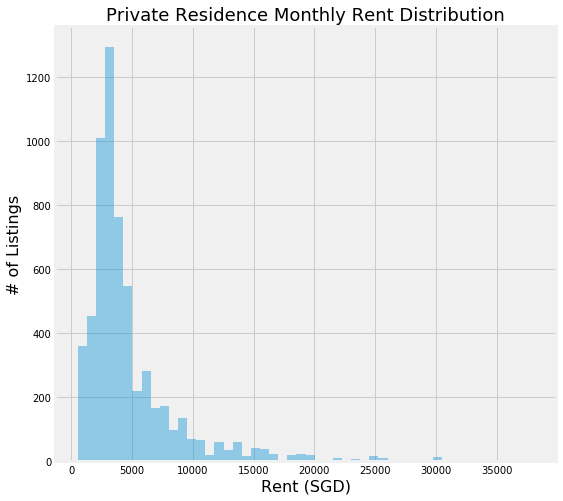

In [45]:
plt.figure(figsize=(8, 8))
plt.title('Private Residence Monthly Rent Distribution', fontsize=18)
sns.distplot(condo_df['rent'], kde=False)
plt.xlabel('Rent (SGD)', fontsize=16)
plt.ylabel('# of Listings', fontsize=16)
plt.show()

At a glance, most of the listings asking rent are below SGD 10,000. We can see some skew to the right, which could be attributed to outliers.

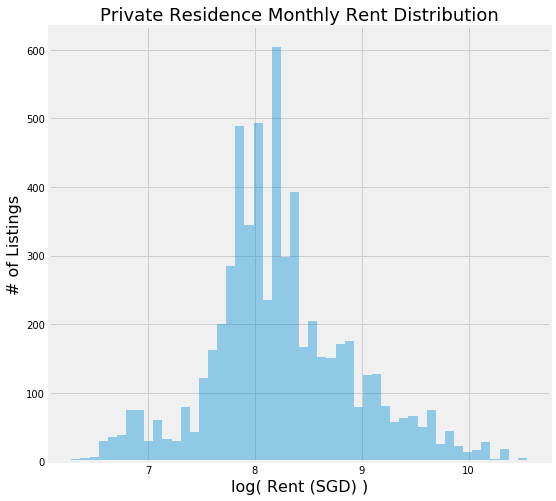

In [46]:
plt.figure(figsize=(8, 8))
plt.title('Private Residence Monthly Rent Distribution', fontsize=18)
sns.distplot(np.log(condo_df['rent']), kde=False)
plt.xlabel('log( Rent (SGD) )', fontsize=16)
plt.ylabel('# of Listings', fontsize=16)
plt.show()

Mapping the rent on a logarithmic scale, we can see that the distribution looks more Gaussian.

Next, we will look at features that are highly correlated to rent.

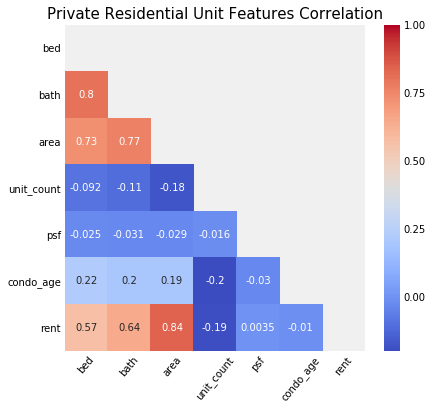

In [47]:
# For data visualisation, exclude columns such as id/name/developer/etc that are irrelevant
condovis_df = condo_df[['prop_type','district','bed','bath','furnish','area','tenure','unit_count',
                         'unit_count_group','room_type','lease','model','psf','region','condo_age',
                         'condo_age_group','lease_bin','rent']]


plt.figure(figsize=(6, 6))
plt.xticks(rotation=50, fontsize=10)
plt.title('Private Residential Unit Features Correlation', fontsize=15)

condovis_corr = condovis_df.corr()
mask = np.zeros_like(condovis_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(condovis_corr, mask=mask, annot=True, cmap='coolwarm')
plt.show()

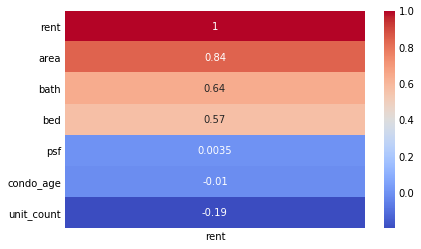

In [48]:
sns.heatmap(condovis_corr[['rent']].sort_values(by='rent', ascending=False), annot=True,cmap='coolwarm')
plt.show()

Unsuprisingly, `'area'` is highly correlated to rental rent. `'bath'` and `'bed'` also have strong positive correlation to rental rent, although we can reason that these features are just proxies for `'area'`, which will lead to some degree of multicollinearity.

Also, we can see that `'unit_count'` has a mild negative correlation to rental rent. We had expected that `'unit_count'` (which is a proxy for residential density) to be inversely correlated to rental rent, but the correlation strength seems to be lesser that anticipated.

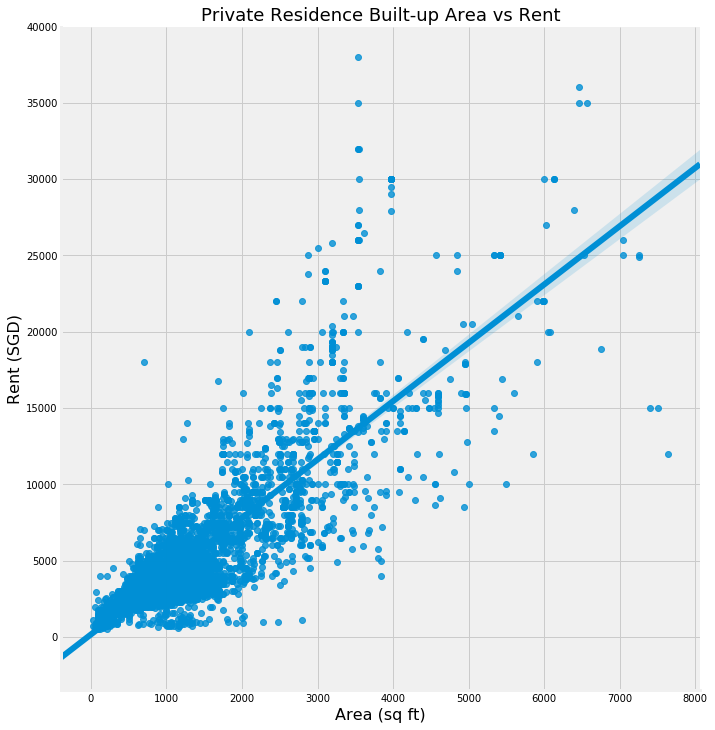

In [49]:
sns.lmplot(data=condo_df,x='area',y='rent',size=10)
plt.title('Private Residence Built-up Area vs Rent', fontsize=18)
plt.xlabel('Area (sq ft)', fontsize=16)
plt.ylabel('Rent (SGD)', fontsize=16)
plt.show()

From a glance, units with larger built-up area commands higher rent. Outliers can be attributed to peculiar factors such as penthouse, units with spectacular views, units with landed area (townhouse) or rarity (properties with very small `'unit_counts'`). Due to the positive strong correlation, we expect that `'area'` would be a good predictor for rent.

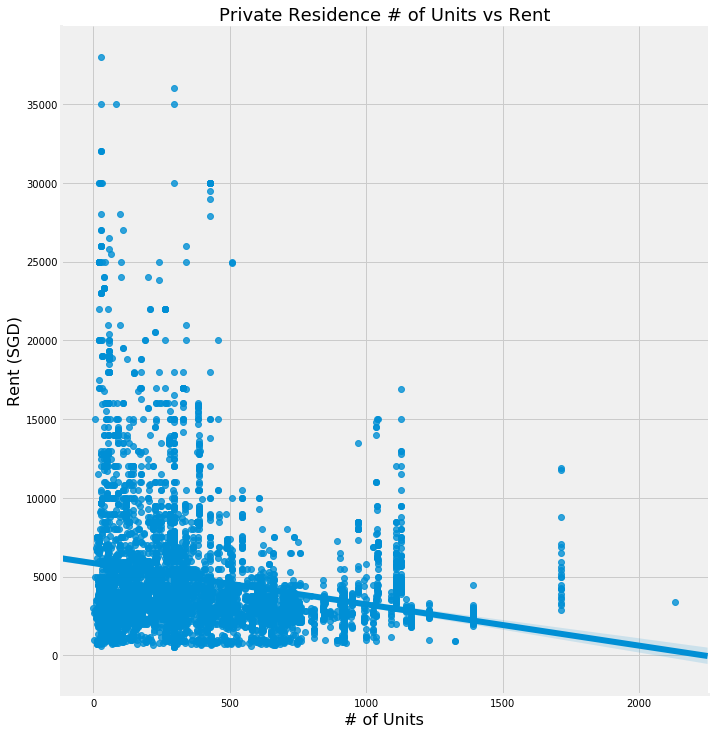

In [50]:
sns.lmplot(data=condo_df,x='unit_count',y='rent',size=10)
plt.title('Private Residence # of Units vs Rent', fontsize=18)
plt.xlabel('# of Units', fontsize=16)
plt.ylabel('Rent (SGD)', fontsize=16)
plt.show()

We saw earlier that `'unit_count'` has a mild negative correlation to rent. This scatter plot shows that there is no clear, discernable negative trend, hence we do not expect this variable to play a significant role in predicting rent. 

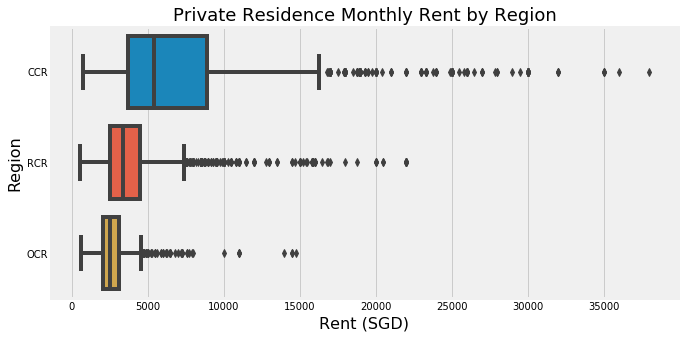

In [51]:
plt.figure(figsize=(10, 5))
plt.title('Private Residence Monthly Rent by Region', fontsize=18)
sns.boxplot(x = condo_df['rent'], y = condo_df['region'])
plt.xlabel('Rent (SGD)', fontsize=16)
plt.ylabel('Region', fontsize=16)
plt.show()

When we consolidate the districts into Core Central Region (CCR), Rest of Central Region (RCR) and Outside of Central Region (OCR), the rent discrimination becomes more distinct.

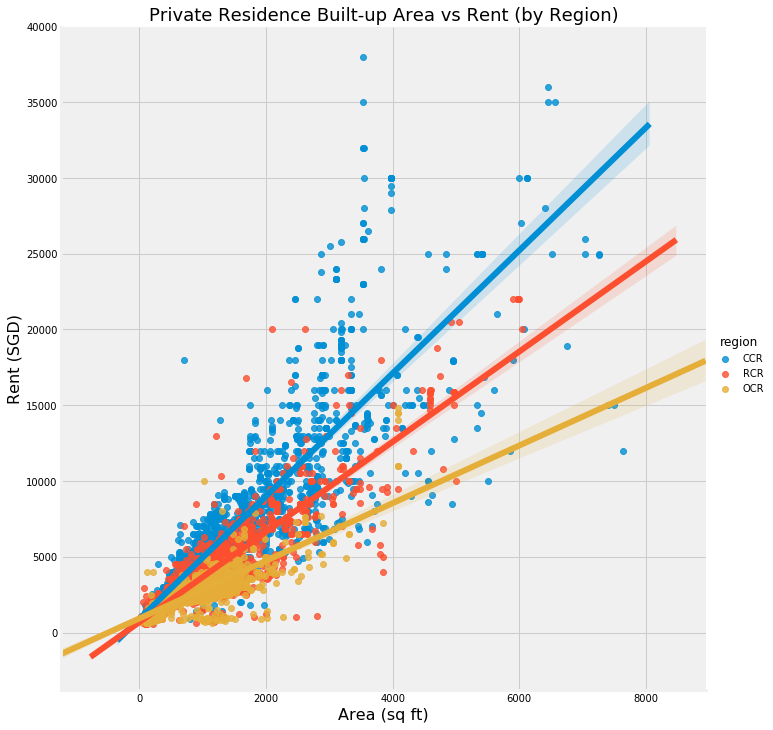

In [52]:
sns.lmplot(data=condo_df,x='area',y='rent',hue='region',size=10)
plt.title('Private Residence Built-up Area vs Rent (by Region)', fontsize=18)
plt.xlabel('Area (sq ft)', fontsize=16)
plt.ylabel('Rent (SGD)', fontsize=16)
plt.show()

This plot reinforces the fact that residential units in the city area fetches higher rental rent, and the rent increase is remarkably steeper.

In [53]:
# We will conduct some hypothesis testing to see if our assumption about rent differentiation is valid
# Begin by checking the basic stats for the data of interest
print(condo_df[condo_df['region']=='CCR'].shape)
print(condo_df[condo_df['region']=='RCR'].shape)
print(condo_df[condo_df['region']=='OCR'].shape)
print('CCR median:',condo_df[condo_df['region']=='CCR']['rent'].median())
print('RCR median:',condo_df[condo_df['region']=='RCR']['rent'].median())
print('OCR median:',condo_df[condo_df['region']=='OCR']['rent'].median())
print('CCR mean:',condo_df[condo_df['region']=='CCR']['rent'].mean())
print('RCR mean:',condo_df[condo_df['region']=='RCR']['rent'].mean())
print('OCR mean:',condo_df[condo_df['region']=='OCR']['rent'].mean())
print('CCR Std Dev:',condo_df[condo_df['region']=='CCR']['rent'].std())
print('RCR Std Dev:',condo_df[condo_df['region']=='RCR']['rent'].std())
print('OCR Std Dev:',condo_df[condo_df['region']=='OCR']['rent'].std())

(2321, 27)
(2099, 27)
(1670, 27)
CCR median: 5400.0
RCR median: 3400.0
OCR median: 2500.0
CCR mean: 7227.672124084446
RCR mean: 4029.137208194378
OCR mean: 2660.146107784431
CCR Std Dev: 5422.178451996537
RCR Std Dev: 2789.3607180990393
OCR Std Dev: 1272.0112545592528


In [54]:
# These 3 regions have varied number of postings, we will randomly sample some
ccr_sample = condo_df[condo_df['region']=='CCR']['rent'].sample(1000)
rcr_sample = condo_df[condo_df['region']=='RCR']['rent'].sample(1000)
ocr_sample = condo_df[condo_df['region']=='OCR']['rent'].sample(1000)

In [55]:
# Perform t-test amongst these 3 regions
# H0: Difference of rental rent of any 2 region is not statistically significant. Set alpha = 0.05.
t_stat, p_value = stats.ttest_ind(ccr_sample, rcr_sample)
print('CCR vs RCR T stat:',t_stat)
print('CCR vs RCR P value:',p_value)
print('')
t_stat, p_value = stats.ttest_ind(ccr_sample, ocr_sample)
print('CCR vs OCR T stat:',t_stat)
print('CCR vs OCR P value:',p_value)
print('')
t_stat, p_value = stats.ttest_ind(rcr_sample, ocr_sample)
print('RCR vs OCR T stat:',t_stat)
print('RCR vs OCR P value:',p_value)

CCR vs RCR T stat: 16.698635746450893
CCR vs RCR P value: 1.058996448755981e-58

CCR vs OCR T stat: 26.43294922520695
CCR vs OCR P value: 2.736506035464835e-132

RCR vs OCR T stat: 14.482204019741001
RCR vs OCR P value: 2.836125477764684e-45


For all 3 cases, p << 0.05, so the rental rent difference by region is statistically significant.

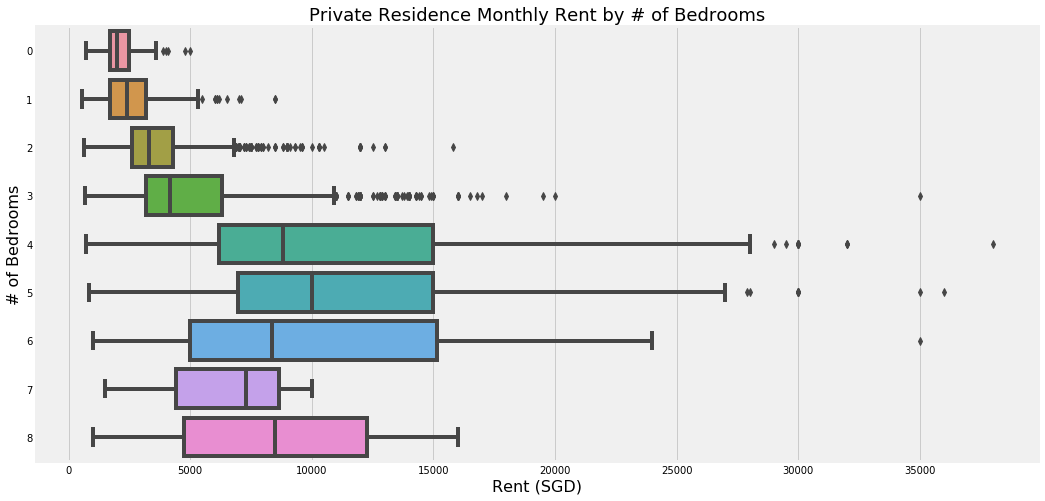

In [56]:
plt.figure(figsize=(16, 8))
plt.title('Private Residence Monthly Rent by # of Bedrooms', fontsize=18)
sns.boxplot(x = condo_df['rent'], y = condo_df['bed'].astype('category'))
plt.xlabel('Rent (SGD)', fontsize=16)
plt.ylabel('# of Bedrooms', fontsize=16)
plt.show()

As the number of bedrooms increases, the built-up area of the residential unit increases in tandem, leading to a rise in rent.

NB: Units with zero bedrooms refer to studio apartments.

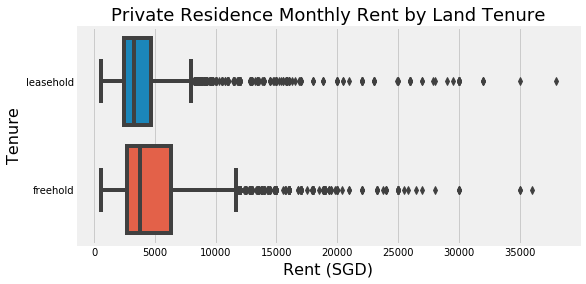

In [57]:
plt.figure(figsize=(8, 4))
plt.title('Private Residence Monthly Rent by Land Tenure', fontsize=18)
sns.boxplot(x = condo_df['rent'], y = condo_df['tenure'])
plt.xlabel('Rent (SGD)', fontsize=16)
plt.ylabel('Tenure', fontsize=16)
plt.show()

Properties located on freehold land command a higher rent than those on leasehold. We suspect that the rent is not affected by the nature of land tenure per se; but rather landlords would have paid a premium to secure properties built on freehold land, so they would have to raise the rent in tandem to recoup their extra capital expenditure.

In [58]:
# We will conduct some hypothesis testing to see if our assumption about rent differentiation is valid
# Begin by checking the basic stats for the data of interest
print(condo_df[condo_df['tenure']=='freehold'].shape)
print(condo_df[condo_df['tenure']=='leasehold'].shape)
print('Freehold median:',condo_df[condo_df['tenure']=='freehold']['rent'].median())
print('Leasehold median:',condo_df[condo_df['tenure']=='leasehold']['rent'].median())
print('Freehold mean:',condo_df[condo_df['tenure']=='freehold']['rent'].mean())
print('Leasehold mean:',condo_df[condo_df['tenure']=='leasehold']['rent'].mean())
print('Freehold Std Dev:',condo_df[condo_df['tenure']=='freehold']['rent'].std())
print('Leasehold Std Dev:',condo_df[condo_df['tenure']=='leasehold']['rent'].std())

(2932, 27)
(3158, 27)
Freehold median: 3800.0
Leasehold median: 3300.0
Freehold mean: 5391.259549795362
Leasehold mean: 4391.3416719442685
Freehold Std Dev: 4518.385662533483
Leasehold Std Dev: 3916.0557213250445


In [59]:
# These 2 classes have varied number of postings, we will randomly sample some
freehold_sample = condo_df[condo_df['tenure']=='freehold']['rent'].sample(1000)
leasehold_sample = condo_df[condo_df['tenure']=='leasehold']['rent'].sample(1000)

In [60]:
# Perform t-test for these 2 classes
# H0: Difference of rental rent between freehold vs leasehold is not statistically significant. Set alpha = 0.05.
t_stat, p_value = stats.ttest_ind(freehold_sample, leasehold_sample)
print('Freehold vs Leasehold T stat:',t_stat)
print('Freehold vs Leasehold P value:',p_value)

Freehold vs Leasehold T stat: 5.759956280043637
Freehold vs Leasehold P value: 9.720156521539848e-09


In [61]:
# p < 0.05
# There is indeed a significant difference between freehold properties' rent vs leasehold properties' rent.

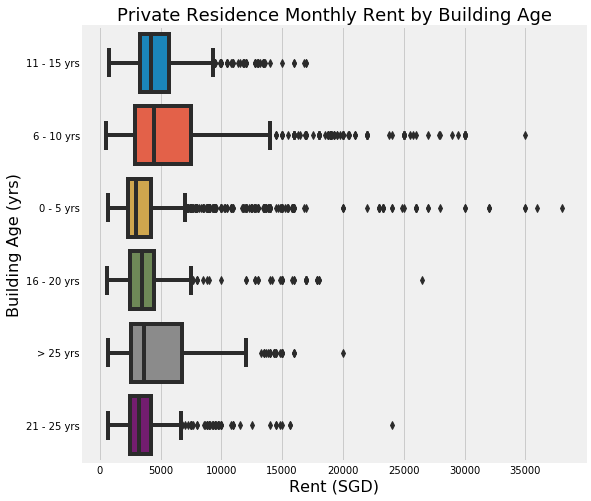

In [62]:
plt.figure(figsize=(8, 8))
plt.title('Private Residence Monthly Rent by Building Age', fontsize=18)
sns.boxplot(x = condo_df['rent'], y = condo_df['condo_age_group'])
plt.xlabel('Rent (SGD)', fontsize=16)
plt.ylabel('Building Age (yrs)', fontsize=16)
plt.show()

We had expected that, all other things equal, recently built residential units would command higher rental rents. But it seems that the median rental rent for the 0-5 yrs group is lower than the 6-10 yrs group or even the 11-15 yrs group.

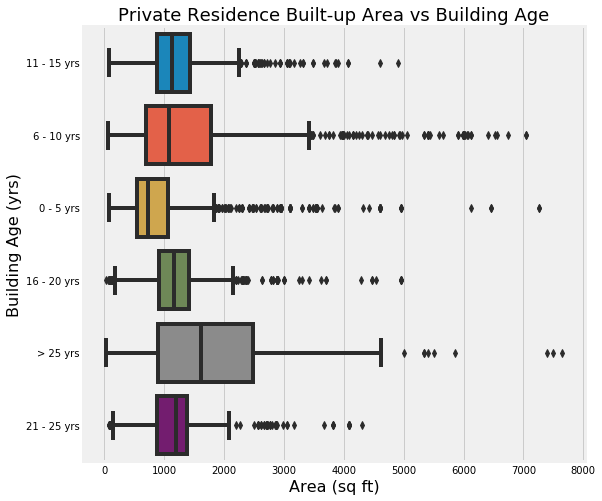

In [63]:
plt.figure(figsize=(8, 8))
plt.title('Private Residence Built-up Area vs Building Age', fontsize=18)
sns.boxplot(x = condo_df['area'], y = condo_df['condo_age_group'])
plt.xlabel('Area (sq ft)', fontsize=16)
plt.ylabel('Building Age (yrs)', fontsize=16)
plt.show()

We can observe that residential units build in the past 5 years are smaller than those built much earlier. This might explain how the expected effect of newer units (which should fetch higher rental rent) has been masked by the <i>(relatively)</i> stronger effect of reduced floor area (which would bring down the rental rent).

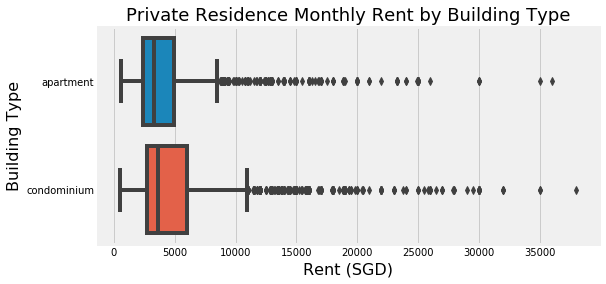

In [64]:
plt.figure(figsize=(8, 4))
plt.title('Private Residence Monthly Rent by Building Type', fontsize=18)
sns.boxplot(x = condo_df['rent'], y = condo_df['prop_type'])
plt.xlabel('Rent (SGD)', fontsize=16)
plt.ylabel('Building Type', fontsize=16)
plt.show()

In [65]:
# We will conduct some hypothesis testing to see if our assumption about rent differentiation is valid
# Begin by checking the basic stats for the data of interest
print(condo_df[condo_df['prop_type']=='condominium'].shape)
print(condo_df[condo_df['prop_type']=='apartment'].shape)
print('Condominium median:',condo_df[condo_df['prop_type']=='condominium']['rent'].median())
print('Apartment median:',condo_df[condo_df['prop_type']=='apartment']['rent'].median())
print('Condominium mean:',condo_df[condo_df['prop_type']=='condominium']['rent'].mean())
print('Apartment mean:',condo_df[condo_df['prop_type']=='apartment']['rent'].mean())
print('Condominium Std Dev:',condo_df[condo_df['prop_type']=='condominium']['rent'].std())
print('Apartment Std Dev:',condo_df[condo_df['prop_type']=='apartment']['rent'].std())

(3542, 27)
(2548, 27)
Condominium median: 3600.0
Apartment median: 3302.5
Condominium mean: 5203.093167701863
Apartment mean: 4413.529827315541
Condominium Std Dev: 4537.904662335213
Apartment Std Dev: 3755.946013315472


In [66]:
# These 2 classes have varied number of postings, we will randomly sample some
condo_sample = condo_df[condo_df['prop_type']=='condominium']['rent'].sample(1000)
aptmt_sample = condo_df[condo_df['prop_type']=='apartment']['rent'].sample(1000)

In [67]:
# Perform t-test for these 2 classes
# H0: Difference of mean rental rent between condo vs apartment is not statistically significant. Set alpha = 0.05.
t_stat, p_value = stats.ttest_ind(condo_sample, aptmt_sample)
print('Condominium vs Apartment T stat:',t_stat)
print('Condominium vs Apartment P value:',p_value)

Condominium vs Apartment T stat: 5.323967804306098
Condominium vs Apartment P value: 1.1294112060561245e-07


In [68]:
# p < 0.05 => reject H0
# So there is indeed a significant difference in apartment rent vs condominium rent

## Baseline modelling

In [69]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [70]:
# Setup baseline model df, using just 'area' as predictor
df_base = condo_df[['area']]

# Setup target vector
y = condo_df['rent']

In [71]:
# Normalise baseline model df
ss = StandardScaler()
Xs = ss.fit_transform(df_base)
Xs.shape

(6090, 1)

In [72]:
# Perform train test split, create holdout set for testing
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=10)

In [73]:
# Apply standard linear regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
scores = cross_val_score(linreg, X_train, y_train, cv=5)
print("Cross Validation scores:", scores)
print("Cross Validation mean score:", scores.mean())
print('')
print("Beta:", linreg.coef_)
print("Intercept:", linreg.intercept_)

Cross Validation scores: [0.68090037 0.72701815 0.68369043 0.71612546 0.70521728]
Cross Validation mean score: 0.7025903361114575

Beta: [3578.46877621]
Intercept: 4861.676200558996


In [74]:
# Baseline score, using just 'area' as predictor variable
y_pred = linreg.predict(X_test)
print("Baseline Model R^2 score\t\t:", r2_score(y_test, y_pred))

# We should aim to perform better than this R^2 score of 0.6544 for our actual model

# Get Root Mean Squared Error (RMSE)
print("Baseline Model Root Mean Squared Error\t:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Get Median absolute error
print("Baseline Model Median Absolute Error\t:", median_absolute_error(y_test, y_pred))

# Get Mean absolute error
print("Baseline Model Mean Absolute Error\t:", mean_absolute_error(y_test, y_pred))

Baseline Model R^2 score		: 0.7286937179693813
Baseline Model Root Mean Squared Error	: 2259.34751035961
Baseline Model Median Absolute Error	: 843.4567910904184
Baseline Model Mean Absolute Error	: 1367.2319607301906


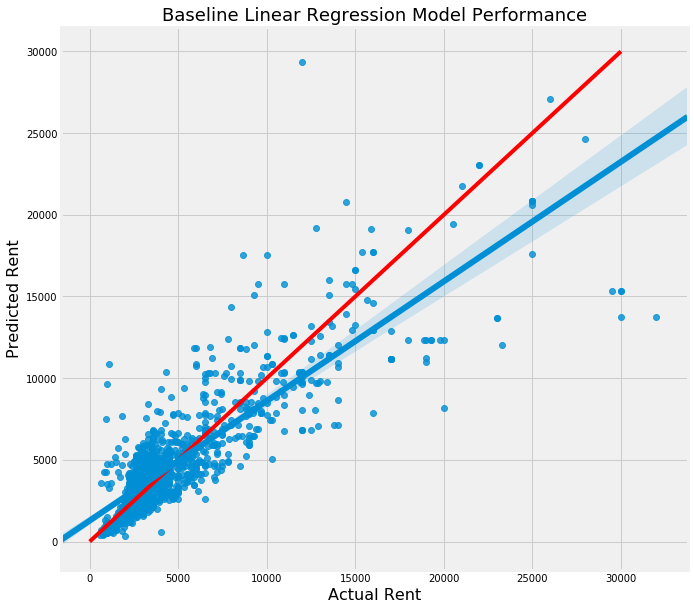

In [75]:
plt.figure(figsize=(10, 10))
plt.plot((0,30000),(0,30000), color='r')
sns.regplot(x = y_test, y = y_pred)
plt.title('Baseline Linear Regression Model Performance', fontsize=18)
plt.xlabel('Actual Rent', fontsize=16)
plt.ylabel('Predicted Rent', fontsize=16)
plt.show()

In the ideal case, the model's prediction would match the actual rent, i.e. predicted rent = actual rent. This is depicted by the red line. In actual case, we see a spread of prediction point about the model regression line (blue).

## Pre-modelling: Construct design matrix

In [76]:
df_clean = condo_df[['region','bed','furnish','area','tenure',
                     'condo_age_group','room_type','lease_bin','rent']]

In [77]:
print(df_clean.shape)
df_clean.head()

(6090, 9)


,region,bed,furnish,area,tenure,condo_age_group,room_type,lease_bin,rent
0,CCR,1,fully furnished,678,leasehold,11 - 15 yrs,whole house,flexible,3300
1,CCR,2,partially furnished,1076,leasehold,6 - 10 yrs,whole house,flexible,5400
2,CCR,1,partially furnished,775,leasehold,6 - 10 yrs,whole house,flexible,4400
3,CCR,3,fully furnished,1615,leasehold,6 - 10 yrs,whole house,flexible,8300
4,CCR,1,partially furnished,829,leasehold,6 - 10 yrs,whole house,1-12 months,5300


In [78]:
# Partition the design matrix and target variable vector
X = df_clean.iloc[:,:-1]
y = df_clean.iloc[:,-1]

# Quick check on target vector
y.head()

0    3300
1    5400
2    4400
3    8300
4    5300
Name: rent, dtype: int64

In [79]:
# Create sub dataframe for numerical variables only, but exclude 'rent' because it is target variable
df1 = df_clean.select_dtypes(include="number").drop('rent', axis=1)
df1.columns

Index(['bed', 'area'], dtype='object')

In [80]:
# Standardise the numerical variables sub dataframe
ss = StandardScaler()
Xs = ss.fit_transform(df1)
Xs

array([[-1.15405308, -0.59206442],
       [-0.27935697, -0.16661762],
       [-1.15405308, -0.48837512],
       ...,
       [-0.27935697, -0.46485796],
       [-0.27935697, -0.51509917],
       [-1.15405308, -1.18854511]])

In [81]:
# Create sub dataframe for categorical variables (basically everything that is left behind)
df2 = df_clean.select_dtypes(exclude="number")
df2.head()

,region,furnish,tenure,condo_age_group,room_type,lease_bin
0,CCR,fully furnished,leasehold,11 - 15 yrs,whole house,flexible
1,CCR,partially furnished,leasehold,6 - 10 yrs,whole house,flexible
2,CCR,partially furnished,leasehold,6 - 10 yrs,whole house,flexible
3,CCR,fully furnished,leasehold,6 - 10 yrs,whole house,flexible
4,CCR,partially furnished,leasehold,6 - 10 yrs,whole house,1-12 months


In [82]:
# Dummify the categorical features
X_dummy = pd.get_dummies(df2, drop_first=True)
X_dummy.shape

(6090, 15)

In [83]:
# Merge the dummified sub dataframe with the standardised numerical variables sub dataframe
X_dummy = X_dummy.join(pd.DataFrame(Xs, columns=df1.columns))
print(X_dummy.shape)
X_dummy.head()

(6090, 17)


,region_OCR,region_RCR,furnish_not furnished,furnish_partially furnished,tenure_leasehold,condo_age_group_11 - 15 yrs,condo_age_group_16 - 20 yrs,condo_age_group_21 - 25 yrs,condo_age_group_6 - 10 yrs,condo_age_group_> 25 yrs,room_type_master room,room_type_whole house,lease_bin_13-24 months,lease_bin_Above 24 months,lease_bin_flexible,bed,area
0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,-1.154053,-0.592064
1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,-0.279357,-0.166618
2,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,-1.154053,-0.488375
3,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0.595339,0.409553
4,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,-1.154053,-0.430651


In [84]:
# Perform train test split, create holdout set for testing
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.2, random_state=10)

In [85]:
# Construct ensemble dataframe. We will take the mean of these models' results.
ensemble_result = pd.DataFrame(columns=["y_test","y_linreg","y_lasso","y_ridge","y_enet","y_rf","y_ensemble"])
ensemble_result['y_test'] = y_test

## Modelling

In [86]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error

#### Standard Linear Regression on Full Dataset Model

In [87]:
# Apply standard linear regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
scores = cross_val_score(linreg, X_train, y_train, cv=5)
print("Cross Validation scores:", scores)
print("Cross Validation mean score:", scores.mean())

Cross Validation scores: [0.77757958 0.80510653 0.77495559 0.8094684  0.7905103 ]
Cross Validation mean score: 0.7915240812157626


In [88]:
# Full dataset model score
# Reminder, we are looking to perform better than baseline score of 0.7286
y_pred = linreg.predict(X_test)
print("Full Dataset Model R^2 Score\t\t\t:", r2_score(y_test, y_pred))

# Get Root Mean Squared Error (RMSE)
print("Full Dataset Model Root Mean Squared Error\t:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Get Median absolute error
print("Full Dataset Model Median Absolute Error\t:", median_absolute_error(y_test, y_pred))

# Get Mean absolute error
print("Full Dataset Model Mean Absolute Error\t\t:", mean_absolute_error(y_test, y_pred))

Full Dataset Model R^2 Score			: 0.8106214956206748
Full Dataset Model Root Mean Squared Error	: 1887.6368683726155
Full Dataset Model Median Absolute Error	: 642.5784790587413
Full Dataset Model Mean Absolute Error		: 1087.9144081044587


In [89]:
# Consolidate the result nicely for easier reading
result = pd.DataFrame(data=list(zip(X_dummy.columns,linreg.coef_,np.abs(linreg.coef_))),
                      columns=['col','coef','abs_coef'])
print(result.shape)
result.sort_values('abs_coef',ascending=False)

(17, 3)


,col,coef,abs_coef
16,area,3512.123371,3512.123371
9,condo_age_group_> 25 yrs,-2640.643711,2640.643711
0,region_OCR,-2560.073977,2560.073977
1,region_RCR,-1796.154886,1796.154886
7,condo_age_group_21 - 25 yrs,-1505.147788,1505.147788
6,condo_age_group_16 - 20 yrs,-1489.158418,1489.158418
5,condo_age_group_11 - 15 yrs,-1013.078595,1013.078595
13,lease_bin_Above 24 months,581.202272,581.202272
4,tenure_leasehold,455.434127,455.434127
11,room_type_whole house,-392.519743,392.519743


In [90]:
ensemble_result['y_linreg'] = y_pred

In [91]:
ensemble_result.head()

,y_test,y_linreg,y_lasso,y_ridge,y_enet,y_rf,y_ensemble
4639,2600,3521.462096,NaN,NaN,NaN,NaN,NaN
2122,6300,5620.244008,NaN,NaN,NaN,NaN,NaN
4112,3100,2700.252253,NaN,NaN,NaN,NaN,NaN
3868,10000,10055.571030,NaN,NaN,NaN,NaN,NaN
3324,5200,4029.863326,NaN,NaN,NaN,NaN,NaN


#### Lasso Linear Regression on Full Dataset Model

In [92]:
# Apply Lasso regression
lassoregcv = LassoCV(n_alphas=100, cv=5, random_state=1, max_iter=10000)
lassoregcv.fit(X_train, y_train)
print("Alpha:",lassoregcv.alpha_)

scores = cross_val_score(lassoregcv, X_train, y_train, cv=5)
print("Cross Validation scores:", scores)
print("Cross Validation mean score:", scores.mean())

Alpha: 4.634973812876321
Cross Validation scores: [0.77855938 0.80633439 0.77332926 0.80874942 0.79127355]
Cross Validation mean score: 0.7916491996873528


In [93]:
# Full dataset model score via Lasso Linear Regression
# Reminder, we are looking to perform better than baseline score of 0.7286
y_pred = lassoregcv.predict(X_test)
print("Full Dataset Model R^2 Score\t\t\t:", r2_score(y_test, y_pred))

# Get Root Mean Squared Error (RMSE)
print("Full Dataset Model Root Mean Squared Error\t:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Get Median absolute error
print("Full Dataset Model Median Absolute Error\t:", median_absolute_error(y_test, y_pred))

# Get Mean absolute error
print("Full Dataset Model Mean Absolute Error\t\t:", mean_absolute_error(y_test, y_pred))

Full Dataset Model R^2 Score			: 0.8104658970534045
Full Dataset Model Root Mean Squared Error	: 1888.4121762334426
Full Dataset Model Median Absolute Error	: 648.8159224521819
Full Dataset Model Mean Absolute Error		: 1080.8093448536954


In [94]:
# Consolidate the result nicely for easier reading
result = pd.DataFrame(data=list(zip(X_dummy.columns,lassoregcv.coef_,np.abs(lassoregcv.coef_))),
                      columns=['col','coef','abs_coef'])
print(result.shape)
result.sort_values('abs_coef',ascending=False)

(17, 3)


,col,coef,abs_coef
16,area,3492.204152,3492.204152
9,condo_age_group_> 25 yrs,-2494.129653,2494.129653
0,region_OCR,-2478.258882,2478.258882
1,region_RCR,-1744.689735,1744.689735
7,condo_age_group_21 - 25 yrs,-1374.635513,1374.635513
6,condo_age_group_16 - 20 yrs,-1348.332321,1348.332321
5,condo_age_group_11 - 15 yrs,-882.253174,882.253174
4,tenure_leasehold,438.275089,438.275089
11,room_type_whole house,-328.505023,328.505023
8,condo_age_group_6 - 10 yrs,-146.162482,146.162482


In [95]:
ensemble_result['y_lasso'] = y_pred

In [96]:
ensemble_result.head()

,y_test,y_linreg,y_lasso,y_ridge,y_enet,y_rf,y_ensemble
4639,2600,3521.462096,3585.015791,NaN,NaN,NaN,NaN
2122,6300,5620.244008,5643.266175,NaN,NaN,NaN,NaN
4112,3100,2700.252253,2786.505468,NaN,NaN,NaN,NaN
3868,10000,10055.571030,10108.423473,NaN,NaN,NaN,NaN
3324,5200,4029.863326,4003.675561,NaN,NaN,NaN,NaN


#### Ridge Linear Regression on Full Dataset Model

In [97]:
ridge_alphas = np.logspace(-2, 7, 50)

ridgeregcv = RidgeCV(alphas=ridge_alphas, cv=10)
ridgeregcv.fit(X_train, y_train)
print('Alpha: {}'.format(ridgeregcv.alpha_))

scores = cross_val_score(ridgeregcv, X_train, y_train, cv=5)
print("Cross Validation scores:", scores)
print("Cross Validation mean score:", scores.mean())

Alpha: 8.685113737513529
Cross Validation scores: [0.7777391  0.80543869 0.77484155 0.8091971  0.79066477]
Cross Validation mean score: 0.7915762405684836


In [98]:
# Full dataset model score via Ridge Linear Regression
# Reminder, we are looking to perform better than baseline score of 0.7286
y_pred = ridgeregcv.predict(X_test)
print("Full Dataset Model R^2 Score\t\t\t:", r2_score(y_test, y_pred))

# Get Root Mean Squared Error (RMSE)
print("Full Dataset Model Root Mean Squared Error\t:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Get Median absolute error
print("Full Dataset Model Median Absolute Error\t:", median_absolute_error(y_test, y_pred))

# Get Mean absolute error
print("Full Dataset Model Mean Absolute Error\t\t:", mean_absolute_error(y_test, y_pred))

Full Dataset Model R^2 Score			: 0.8106307112460192
Full Dataset Model Root Mean Squared Error	: 1887.5909392798249
Full Dataset Model Median Absolute Error	: 640.4827365901865
Full Dataset Model Mean Absolute Error		: 1082.470879170095


In [99]:
# Consolidate the result nicely for easier reading
result = pd.DataFrame(data=list(zip(X_dummy.columns,ridgeregcv.coef_,np.abs(ridgeregcv.coef_))),
                      columns=['col','coef','abs_coef'])
print(result.shape)
result.sort_values('abs_coef',ascending=False)

(17, 3)


,col,coef,abs_coef
16,area,3498.740560,3498.740560
9,condo_age_group_> 25 yrs,-2535.567710,2535.567710
0,region_OCR,-2508.780528,2508.780528
1,region_RCR,-1763.155692,1763.155692
7,condo_age_group_21 - 25 yrs,-1437.771594,1437.771594
6,condo_age_group_16 - 20 yrs,-1415.787962,1415.787962
5,condo_age_group_11 - 15 yrs,-948.764641,948.764641
13,lease_bin_Above 24 months,475.511410,475.511410
4,tenure_leasehold,451.120801,451.120801
11,room_type_whole house,-347.434984,347.434984


In [100]:
ensemble_result['y_ridge'] = y_pred

In [101]:
ensemble_result.head()

,y_test,y_linreg,y_lasso,y_ridge,y_enet,y_rf,y_ensemble
4639,2600,3521.462096,3585.015791,3568.824282,NaN,NaN,NaN
2122,6300,5620.244008,5643.266175,5617.222206,NaN,NaN,NaN
4112,3100,2700.252253,2786.505468,2742.871649,NaN,NaN,NaN
3868,10000,10055.571030,10108.423473,10071.687648,NaN,NaN,NaN
3324,5200,4029.863326,4003.675561,4008.339233,NaN,NaN,NaN


#### Elastic Net Linear Regression on Full Dataset Model

In [102]:
l1_ratios = np.linspace(0.01, 1.0, 25)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, 
                            n_alphas=30, 
                            cv=10, 
                            max_iter=10000)
optimal_enet.fit(X_train, y_train)
print("Alpha:", optimal_enet.alpha_)
print("L1 ratio:", optimal_enet.l1_ratio_)
optimal_enet_scores = cross_val_score(optimal_enet, X_train, y_train, cv=10)

enet = ElasticNet(alpha=optimal_enet.alpha_, 
                  l1_ratio=optimal_enet.l1_ratio_)
enet.fit(X_train, y_train)
enet_scores = cross_val_score(enet, X_train, y_train, cv=10)
print("Cross Validation scores:", enet_scores)
print("Cross Validation mean score:", enet_scores.mean())

Alpha: 4.449215478366456
L1 ratio: 1.0
Cross Validation scores: [0.76205804 0.79522005 0.809294   0.80308665 0.79683643 0.72488996
 0.81056647 0.80671859 0.79112883 0.78830831]
Cross Validation mean score: 0.7888107331532024


In [103]:
# Full dataset model score via Elastic Net Linear Regression
# Reminder, we are looking to perform better than baseline score of 0.7286
y_pred = enet.predict(X_test)
print("Full Dataset Model R^2 Score\t\t\t:", r2_score(y_test, y_pred))

# Get Root Mean Squared Error (RMSE)
print("Full Dataset Model Root Mean Squared Error\t:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Get Median absolute error
print("Full Dataset Model Median Absolute Error\t:", median_absolute_error(y_test, y_pred))

# Get Mean absolute error
print("Full Dataset Model Mean Absolute Error\t\t:", mean_absolute_error(y_test, y_pred))

Full Dataset Model R^2 Score			: 0.8104751671334347
Full Dataset Model Root Mean Squared Error	: 1888.3659947131055
Full Dataset Model Median Absolute Error	: 648.5193890556775
Full Dataset Model Mean Absolute Error		: 1081.033715247718


In [104]:
# Consolidate the result nicely for easier reading
result = pd.DataFrame(data=list(zip(X_dummy.columns,enet.coef_,np.abs(enet.coef_))),
                      columns=['col','coef','abs_coef'])
print(result.shape)
result.sort_values('abs_coef',ascending=False)

(17, 3)


,col,coef,abs_coef
16,area,3493.043120,3493.043120
9,condo_age_group_> 25 yrs,-2500.157913,2500.157913
0,region_OCR,-2481.574020,2481.574020
1,region_RCR,-1746.794084,1746.794084
7,condo_age_group_21 - 25 yrs,-1379.774726,1379.774726
6,condo_age_group_16 - 20 yrs,-1353.850334,1353.850334
5,condo_age_group_11 - 15 yrs,-887.419115,887.419115
4,tenure_leasehold,438.977880,438.977880
11,room_type_whole house,-331.938190,331.938190
8,condo_age_group_6 - 10 yrs,-150.425343,150.425343


In [105]:
ensemble_result['y_enet'] = y_pred

In [106]:
ensemble_result.head()

,y_test,y_linreg,y_lasso,y_ridge,y_enet,y_rf,y_ensemble
4639,2600,3521.462096,3585.015791,3568.824282,3581.906447,NaN,NaN
2122,6300,5620.244008,5643.266175,5617.222206,5642.240761,NaN,NaN
4112,3100,2700.252253,2786.505468,2742.871649,2783.062393,NaN,NaN
3868,10000,10055.571030,10108.423473,10071.687648,10106.246595,NaN,NaN
3324,5200,4029.863326,4003.675561,4008.339233,4004.798794,NaN,NaN


#### <span style="color:blue">Random Forest Regression on Full Dataset Model</span>

In [107]:
from sklearn.model_selection import GridSearchCV
# Begin by tuning hyperparameter using GridSearchCV()
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Create a seed model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print("Optimal parameters:", grid_search.best_params_)
print("Optimal estimators:", grid_search.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished


Optimal parameters: {'max_depth': 20, 'n_estimators': 200}
Optimal estimators: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [108]:
# Run full dataset Random Forest Regression model using optimised parameters
rf = RandomForestRegressor(n_estimators = grid_search.best_params_['n_estimators'], random_state = 42, 
                           max_depth = grid_search.best_params_['max_depth'], n_jobs = -1)
rf.fit(X_train, y_train)

scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross Validation scores:", scores)
print("Cross Validation mean score:", scores.mean())

Cross Validation scores: [0.88835524 0.88146008 0.88426279 0.92438464 0.89154923]
Cross Validation mean score: 0.894002394747818


In [109]:
# Full dataset model score via Random Forest Regression
# Reminder, we are looking to perform better than baseline score of 0.7286
y_pred = rf.predict(X_test)
print("Full Dataset Model R^2 Score\t\t\t:", r2_score(y_test, y_pred))

# Get Root Mean Squared Error (RMSE)
print("Full Dataset Model Root Mean Squared Error\t:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Get Median absolute error
print("Full Dataset Model Median Absolute Error\t:", median_absolute_error(y_test, y_pred))

# Get Mean absolute error
print("Full Dataset Model Mean Absolute Error\t\t:", mean_absolute_error(y_test, y_pred))

Full Dataset Model R^2 Score			: 0.9225483959791874
Full Dataset Model Root Mean Squared Error	: 1207.169678026791
Full Dataset Model Median Absolute Error	: 343.0650000000003
Full Dataset Model Mean Absolute Error		: 650.111828440794


In [110]:
# Consolidate the result nicely for easier reading
result = pd.DataFrame(data=list(zip(X_dummy.columns,rf.feature_importances_)),
                      columns=['col','coef'])
print(result.shape)
result.sort_values('coef',ascending=False)

(17, 2)


,col,coef
16,area,0.818087
9,condo_age_group_> 25 yrs,0.035429
0,region_OCR,0.033580
1,region_RCR,0.028116
4,tenure_leasehold,0.023615
15,bed,0.014869
8,condo_age_group_6 - 10 yrs,0.010406
7,condo_age_group_21 - 25 yrs,0.006582
3,furnish_partially furnished,0.006463
6,condo_age_group_16 - 20 yrs,0.004844


In [111]:
# # Save the trained model
# pickle_out = open("./dataset/rf.pickle","wb")
# pickle.dump(rf, pickle_out)
# pickle_out.close()

In [112]:
ensemble_result['y_rf'] = y_pred

In [113]:
ensemble_result.head()

,y_test,y_linreg,y_lasso,y_ridge,y_enet,y_rf,y_ensemble
4639,2600,3521.462096,3585.015791,3568.824282,3581.906447,3913.330230,NaN
2122,6300,5620.244008,5643.266175,5617.222206,5642.240761,4627.609821,NaN
4112,3100,2700.252253,2786.505468,2742.871649,2783.062393,3327.863333,NaN
3868,10000,10055.571030,10108.423473,10071.687648,10106.246595,10857.950000,NaN
3324,5200,4029.863326,4003.675561,4008.339233,4004.798794,4838.414500,NaN


#### Ensemble model via mean of results from earlier models

In [114]:
# Ensemble will take the mean of results using the 5 earlier models
for i in range(len(ensemble_result)):
    ensemble_result.iloc[i,6] = (ensemble_result.iloc[i,1] + ensemble_result.iloc[i,2] + ensemble_result.iloc[i,3] + 
                                 ensemble_result.iloc[i,4] + ensemble_result.iloc[i,5]) / 5

ensemble_result.head()


,y_test,y_linreg,y_lasso,y_ridge,y_enet,y_rf,y_ensemble
4639,2600,3521.462096,3585.015791,3568.824282,3581.906447,3913.330230,3634.11
2122,6300,5620.244008,5643.266175,5617.222206,5642.240761,4627.609821,5430.12
4112,3100,2700.252253,2786.505468,2742.871649,2783.062393,3327.863333,2868.11
3868,10000,10055.571030,10108.423473,10071.687648,10106.246595,10857.950000,10240
3324,5200,4029.863326,4003.675561,4008.339233,4004.798794,4838.414500,4177.02


In [115]:
# Full dataset model score via Ensemble
print("Full Dataset Model R^2 Score\t\t\t:", r2_score(y_test, ensemble_result['y_ensemble']))

# Get Root Mean Squared Error (RMSE)
print("Full Dataset Model Root Mean Squared Error\t:", np.sqrt(mean_squared_error(y_test, ensemble_result['y_ensemble'])))

# Get Median absolute error
print("Full Dataset Model Median Absolute Error\t:", median_absolute_error(y_test, ensemble_result['y_ensemble']))

# Get Mean absolute error
print("Full Dataset Model Mean Absolute Error\t\t:", mean_absolute_error(y_test, ensemble_result['y_ensemble']))

Full Dataset Model R^2 Score			: 0.8543161258069883
Full Dataset Model Root Mean Squared Error	: 1655.6130885514845
Full Dataset Model Median Absolute Error	: 573.2743242079941
Full Dataset Model Mean Absolute Error		: 956.6890469557848


Among all models, random forest regressor has the best performance (R^2 score closest to 1, smallest RMSE and median/mean absolute errors). Random forest works best with categorical features which dominate our models.

## Evaluate model

#### Standard Linear Regression

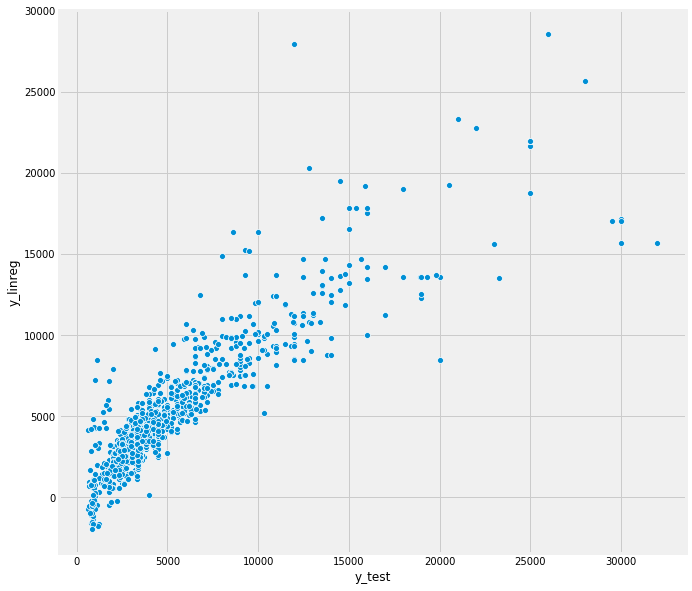

In [116]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = ensemble_result['y_test'], y = ensemble_result['y_linreg'])
plt.show()

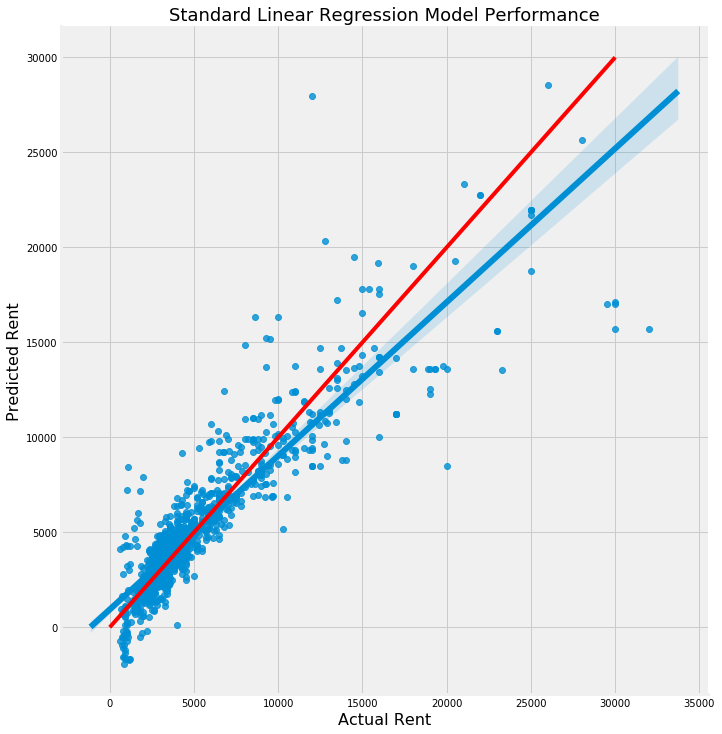

In [117]:
sns.lmplot(data = ensemble_result, x = 'y_test', y = 'y_linreg', size = 10)
plt.plot((0,30000),(0,30000), color='r')
plt.title('Standard Linear Regression Model Performance', fontsize=18)
plt.xlabel('Actual Rent', fontsize=16)
plt.ylabel('Predicted Rent', fontsize=16)
plt.show()

#### Lasso Linear Regression

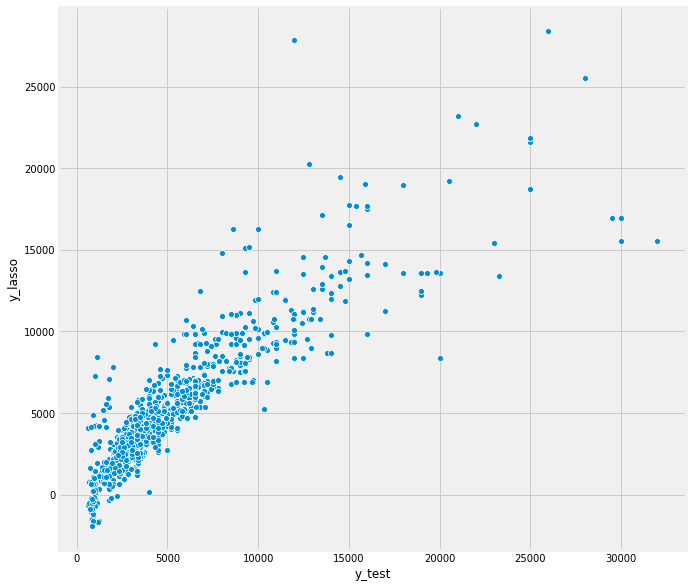

In [118]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = ensemble_result['y_test'], y = ensemble_result['y_lasso'])
plt.show()

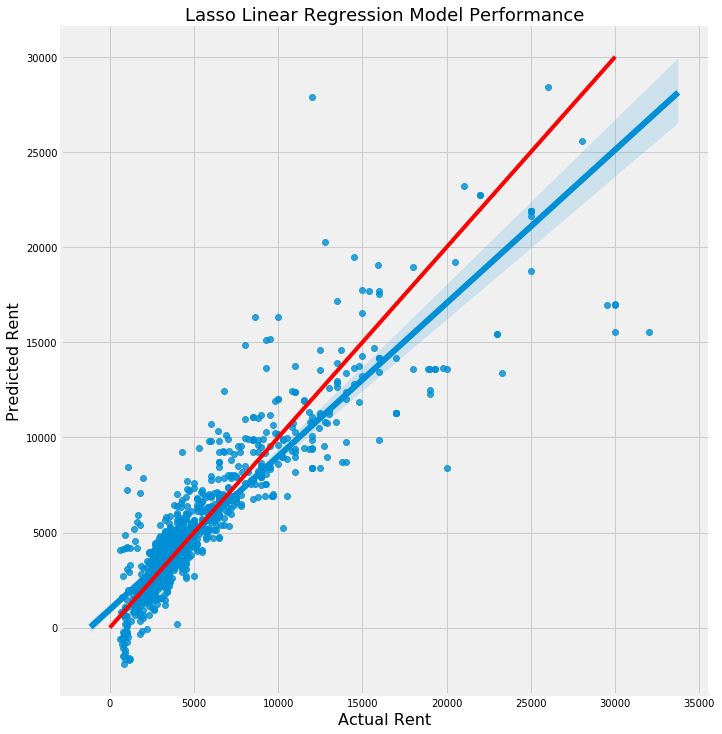

In [119]:
sns.lmplot(data = ensemble_result, x = 'y_test', y = 'y_lasso', size = 10)
plt.plot((0,30000),(0,30000), color='r')
plt.title('Lasso Linear Regression Model Performance', fontsize=18)
plt.xlabel('Actual Rent', fontsize=16)
plt.ylabel('Predicted Rent', fontsize=16)
plt.show()

#### Ridge Linear Regression

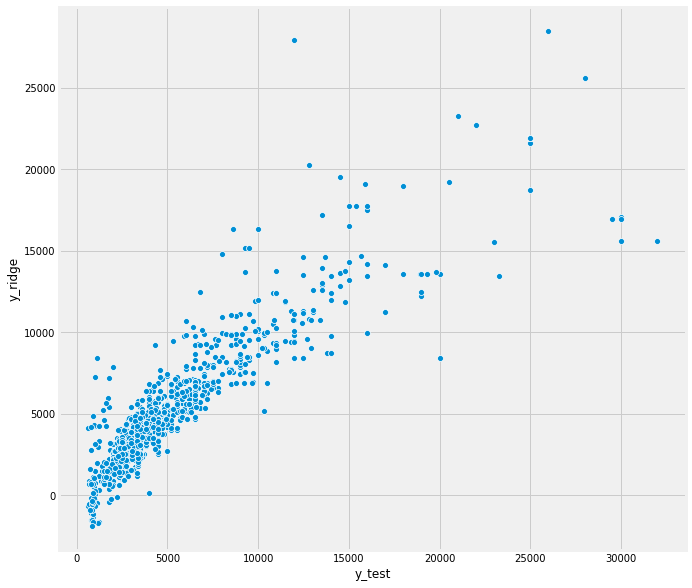

In [120]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = ensemble_result['y_test'], y = ensemble_result['y_ridge'])
plt.show()

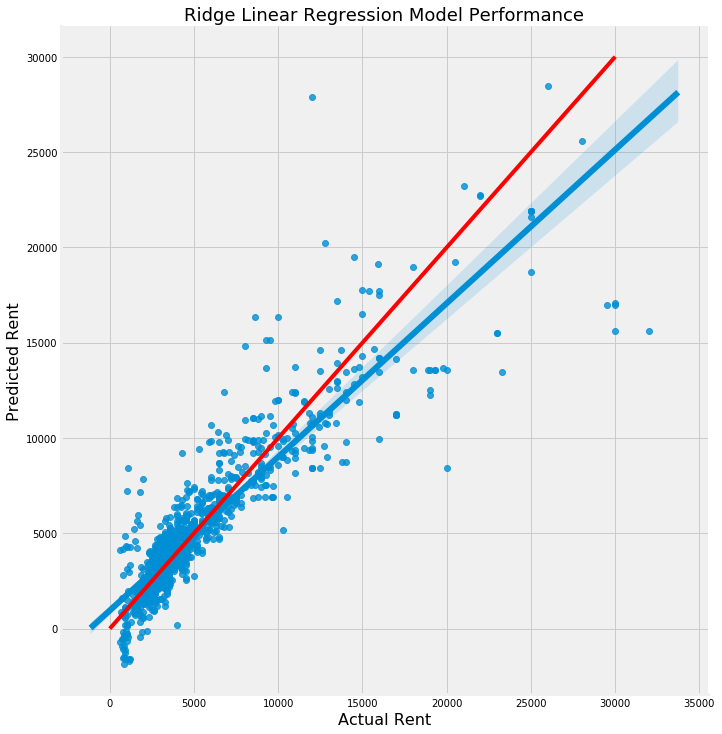

In [121]:
sns.lmplot(data = ensemble_result, x = 'y_test', y = 'y_ridge', size = 10)
plt.plot((0,30000),(0,30000), color='r')
plt.title('Ridge Linear Regression Model Performance', fontsize=18)
plt.xlabel('Actual Rent', fontsize=16)
plt.ylabel('Predicted Rent', fontsize=16)
plt.show()

#### Elastic Net Linear Regression

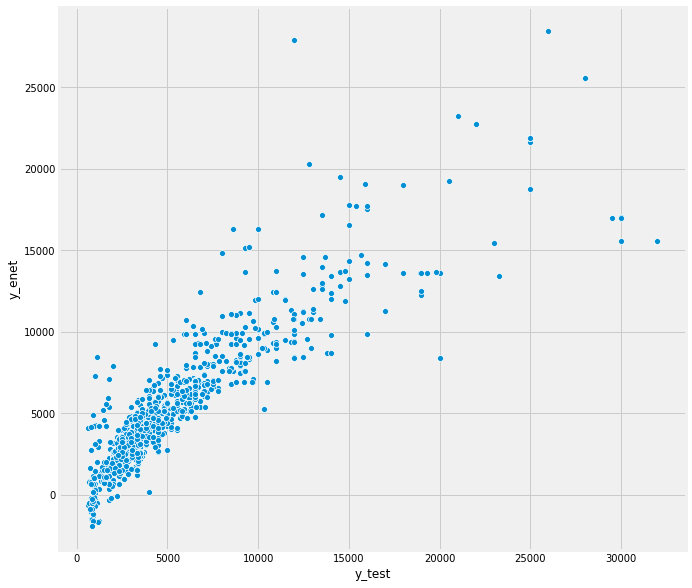

In [122]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = ensemble_result['y_test'], y = ensemble_result['y_enet'])
plt.show()

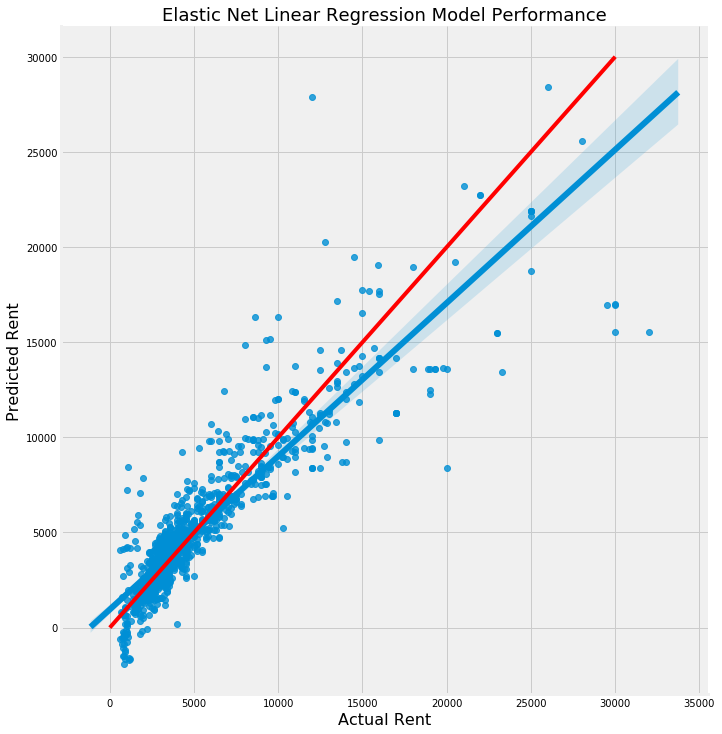

In [123]:
sns.lmplot(data = ensemble_result, x = 'y_test', y = 'y_enet', size = 10)
plt.plot((0,30000),(0,30000), color='r')
plt.title('Elastic Net Linear Regression Model Performance', fontsize=18)
plt.xlabel('Actual Rent', fontsize=16)
plt.ylabel('Predicted Rent', fontsize=16)
plt.show()

#### Random Forest Regression

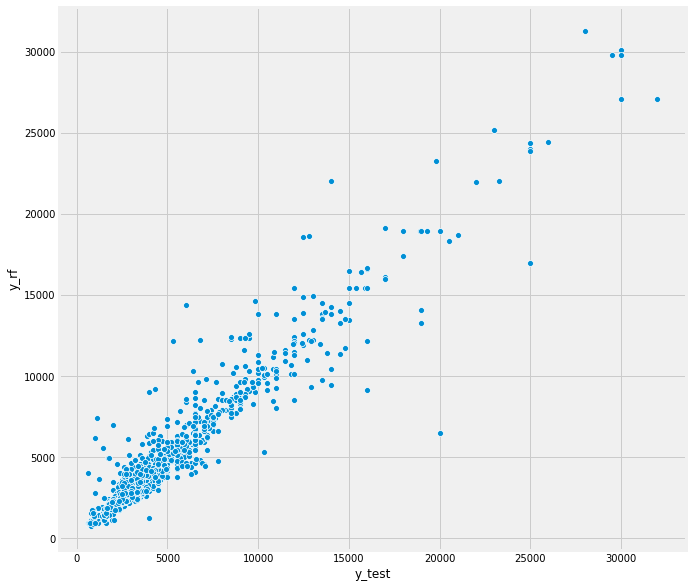

In [124]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = ensemble_result['y_test'], y = ensemble_result['y_rf'])
plt.show()

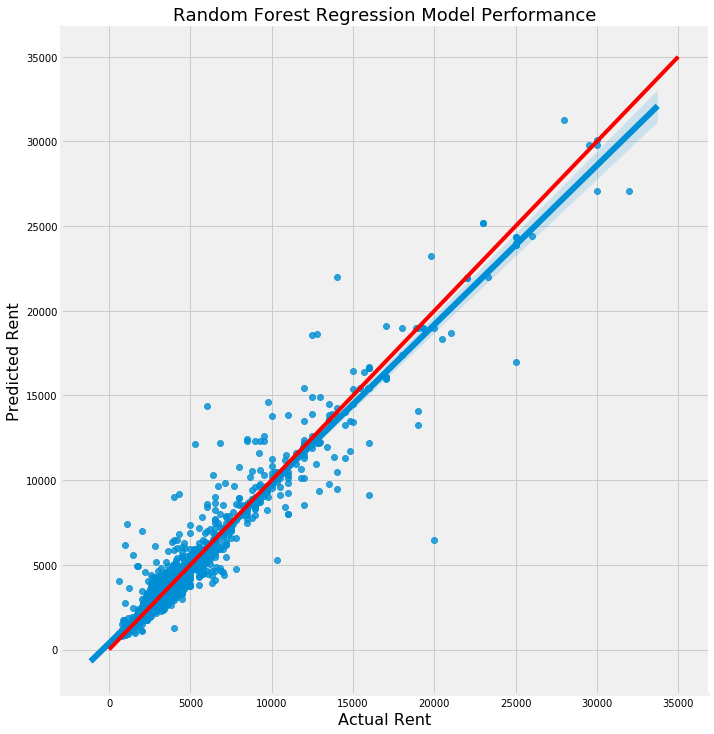

In [125]:
sns.lmplot(data = ensemble_result, x = 'y_test', y = 'y_rf', size = 10)
plt.plot((0,35000),(0,35000), color='r')
plt.title('Random Forest Regression Model Performance', fontsize=18)
plt.xlabel('Actual Rent', fontsize=16)
plt.ylabel('Predicted Rent', fontsize=16)
plt.show()

Random forest regressor give the best result. Tighter spread, no negative predicted values. It tracks the ideal line (red) pretty well.

### Ensemble

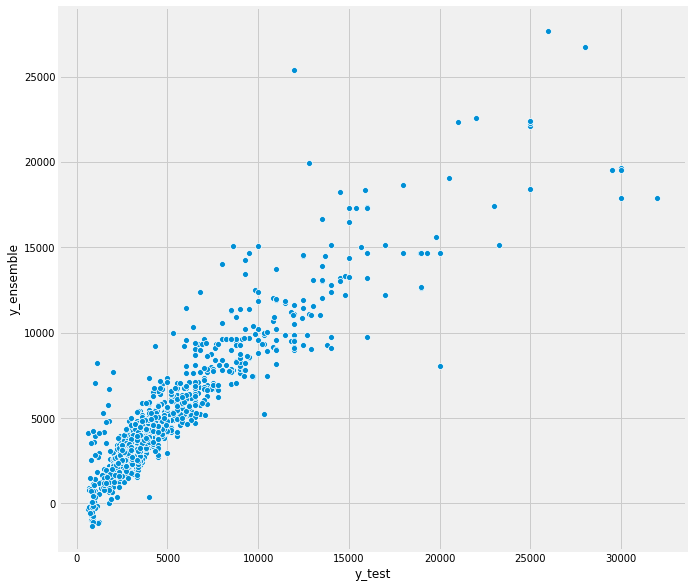

In [126]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = ensemble_result['y_test'], y = ensemble_result['y_ensemble'])
plt.show()

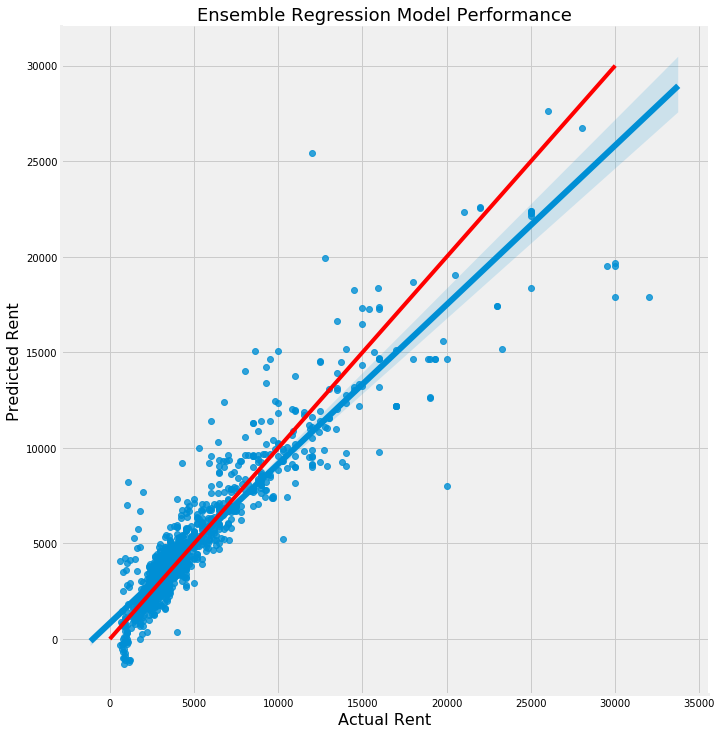

In [127]:
sns.lmplot(data = ensemble_result, x = 'y_test', y = 'y_ensemble', size = 10)
plt.plot((0,30000),(0,30000), color='r')
plt.title('Ensemble Regression Model Performance', fontsize=18)
plt.xlabel('Actual Rent', fontsize=16)
plt.ylabel('Predicted Rent', fontsize=16)
plt.show()

In [128]:
## THE END!